# Modelando la Pandemia

  En este proyecto vamos a estudiar y analizar los datos mundiales de la pandemia COVID-19 usando países modelo de distintas políticas públicas para luego interpretar otras curvas.

Puedes descargar el dataset de casos totales, divididos por país [aquí.](
https://ourworldindata.org/coronavirus-data?country=
) Descarga los datos  formato .csv luego podrás cargarlos en el notebook usando pandas, a partir de eso selecciona los de los países que te interesan, hay un ejemplo de cómo se hace esto en este notebook. 

# ¿Cómo empezó la pandemia?


  La primer parte del trabajo consiste en estudiar cómo se empieza a propagar la pandemia, luego analizaremos las medidas tomadas y su efectividad.

  Al inicio de una pandemia, se estima que los contagios siguen una ley exponencial, esa es la fase de "crecimiento exponencial", luego hay un decaimiento dado por la inmunidad. 

  Los datos de casos confirmados en función del tiempo $C(t)$, pueden aproximarse con el modelo

$C(t)=e^{k(t-t_0)}$

donde $t_0$ es la fecha del primer contagio, y $k$ es un parámetro propio de cada enfermedad, que habla de la contagiosidad. Cuanto mayor es $k$, más grande será el número de casos confirmados dado por la expresión. $k$ depende de el tiempo que una persona enferma contagia, el nivel de infecciosidad del virus y cuántas personas que se pueden contagiar ve una persona enferma por día. Es decir, la circulación. Haciendo cuarententa, $k$ disminuye, con la circulación $k$ aumenta.

  El parámetro $k$ está directamente relacionado con el $R$ del que tanto se habla en los medios. En este proyecto haremos foco en $k$, pero puedes profundizar sobre esto si quieres, empezandó por [aquí](https://es.wikipedia.org/wiki/Ritmo_reproductivo_b%C3%A1sico). 

  Es posible hacer un modelo completo, pero para eso es necesario utilizar ecuaciones diferenciales. Si quieres profundizar sobre eso, busca información sobre "modelo epidemiológico SEIR". Si quieres ver cómo funciona este modelo, puedes empezar por [aquí](http://gabgoh.github.io/COVID/index.html). En ese link está implementado el modelo SEIR (no es necesario entender las ecuaciones en este caso) y el rol que cumplen los parámetros, puedes explorar el impacto de variar $R$ y el resto de los valores para ver cómo impactan en la curva de contagios. Ahora utilizaremos la siguiente expresión para describir únicamente la etapa de crecimiento exponencial.


  Comienza estudiando cómo se distribuyó el $k$ inicial de la pandemia y si es posible elaborar un intervalo de confianza razonable para este valor. Para eso 
  
  1. Elegir diez países del norte (ahí empezó la pandemia) y puedes mide el valor de $k$ inicial de la pandemia, analizando datos del primer tramo.

  2. Analiza si es posible estimar la evolución mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para $k$ a partir de los que obtuviste y así generar un modelo nuevo, basado en la distribución de $k$. Luego compara el modelo con los datos mundiales.

3. Piensa qué significa que el modelo de "bien" o dé "mal" ¿qué indicadores de esto existen?. Luego discute en el informe por qué crees que dio así. Recuerda que es importante elegir bien la población de muestra. Piensa qué criterios puedes elegir para representar bien la población mundial que se contagió al inicio de la pandemia.
 
 # Evaluando estrategias

 Ahora que tienes una manera de obtener información de las curvas, puedes intentar evaluar las estrategias de acción y el comportamiento de las poblaciones, construyendo un clasificador binario. 
1. Elige una categoría binaria que hable de políticas públicas elegidas por los países para enfrentar la pandemia que te interese estudiar, como pueden ser "la población hizo cuarententa" o "la población se vacunó".
2. Piensa qué indicadores de la curva pueden hablar del éxito de la política que quieres estudiar. Por ejemplo, si se tratase de evaluar el éxito de una cuarentena podría ser porcentaje de población  que se contagió o variación del valor de $k$ a partir de que se empezó a implementar esa medida. Elige al menos 3 indicadores.
3. Investiga sobre países que hayan aplicado o no esa política pública, para generar una base de datos. Por ejemplo, Brasil no hizo cuarentena y China hizo una muy estricta. Recuerda hacer una selección inteligente de la porción de datos de la curva de cada país que vas a analizar.
4. Construye un clasificador binario a partir de una regresión logística o usando Naive Bayes para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en función da las categorías "la población hizo cuarentena" y "la población n hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados.
5. Elabora un informe con lo que hayas aprendido a lo largo de este proyecto, donde discutas la utilidad o no de los indicadores que elegiste y del análisis estadístico propuesto.

#¡Comencemos!

  A continuación dejamos un ejemplo de cómo extraer el $k$ inicial de Argentina, usando un ajuste de cuadrados mínimos. Si necesitas los datos mundiales, en la columna de países aparecen como "World".



### a. Explora la fuente de datos: que representa el dataset, hay informacion sobre las columnas:

#### El dataset representa informacion sobre el contagio del covid19 en los diversos paises del mundo que muestra publicamente los datos sobre la pandemia y las medidas tomadas por cada pais repecto a mitigar el evento. 
#### Las columnas tienen la informacion necesaria para poder realizar el analisis. Como son 65 columnas, se trabajara con las siguientes:
#### * location: paises infectados por covid-19
#### * date: fecha de recoleccion de los datos
#### * total_cases: personas infectadas para la fecha solicitada.
#### * new_cases: nuevos casos reportados para la fecha buscada.

### b. Realiza un analisis exploratorio que incluya:
#### * Tomar datos de un pais particular: para este caso, se hizo el anlisis con argentina. 
#### * Seleccionar la etapa de primer crecimiento exponencial de la curva: Para los 10 paises seleccionados, se analizaron sus primeros 60 dias.
#### * Extraer el k de crecimiento exoponencial y comparar el modelo con los datos reales para distintos paises: esto se realiza para cada uno de los 10 paises seleccionados.
#### * Generar un intervalo de confianza para el valor de k, midiendolo para varios paises, con el objetivo de representar la poblacion mundial con la seleccion realizada.

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy.optimize import curve_fit

In [2]:
datos=pd.read_csv('owid-covid-data.csv')
datos

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37746.0,0.5,64.83,511.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37746.0,0.5,64.83,511.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37746.0,0.5,64.83,511.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37746.0,0.5,64.83,511.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37746.0,0.5,64.83,511.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160047,ZWE,Africa,Zimbabwe,2022-02-02,230012.0,161.0,152714.0,5352.0,2.0,4429.0,...,1.6,30.7,36791.0,1.7,61.49,571.0,NaN,NaN,NaN,NaN
160048,ZWE,Africa,Zimbabwe,2022-02-03,230170.0,158.0,153429.0,5357.0,5.0,4714.0,...,1.6,30.7,36791.0,1.7,61.49,571.0,NaN,NaN,NaN,NaN
160049,ZWE,Africa,Zimbabwe,2022-02-04,230170.0,0.0,119571.0,5357.0,0.0,3429.0,...,1.6,30.7,36791.0,1.7,61.49,571.0,NaN,NaN,NaN,NaN
160050,ZWE,Africa,Zimbabwe,2022-02-05,230402.0,232.0,141.0,5362.0,5.0,4143.0,...,1.6,30.7,36791.0,1.7,61.49,571.0,NaN,NaN,NaN,NaN


In [3]:
# Al principio de muchas columnas se encontraran elementos vacios o NaN, debido a que los casos de infeccion no se dieron al mismo tiempo que en la china, y por eso no se piensa imputar aquellos valores,
# faltantes. Tampoco se piensa hacer una filtracion de columnas para trabajar solamente con algunas, la que se necesite sera invocada:  
datos.isna().sum()

iso_code                                        0
continent                                    9605
location                                        0
date                                            0
total_cases                                  2918
                                            ...  
human_development_index                     28825
excess_mortality_cumulative_absolute       154592
excess_mortality_cumulative                154592
excess_mortality                           154592
excess_mortality_cumulative_per_million    154592
Length: 67, dtype: int64

In [4]:
paises=datos['location'] # se carga la columna de paises
confirmados=datos['total_cases'] #se carga la columna de los casos confirmados
confirmados_dia=datos["new_cases"] #se carga la columna de los casos confirmados por dia

Text(0, 0.5, 'cantidad de casos Argentina')

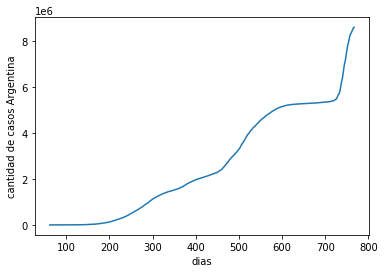

In [5]:
# Se trabajara con el pais Argentina y se analizaran la cantidad de casos totales:

ind_arg=np.where(paises=='Argentina')
ind_arg=ind_arg[0]
casos_arg=confirmados[ind_arg]
dias_arg=np.arange(0,len(casos_arg))
plt.plot(dias_arg,casos_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos Argentina')

Esta es la curva de **casos totales** de la Argentina. Aquí no se ven las olas, ya que estas se ven en la curva de casos confirmados por día, es decir, de casos nuevos. Esta habla de los acumulados, entonces siempre se agregan.


Para ver mejor la curva, podemos tomar el logartimo de los datos. Una curva exponencial se ve lineal en escala logarítmica

Text(0, 0.5, 'log cantidad de casos Argentina')

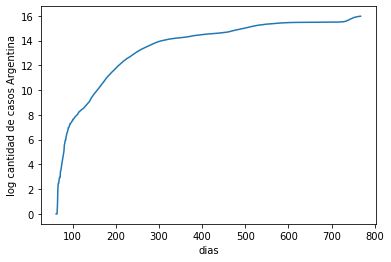

In [6]:
plt.plot(dias_arg,np.log(casos_arg))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos Argentina')

Veamos lo que pasa en los primeros 60 días desde que se detectó el primer caso en Argentina, para ver cómo fue el $k$ inicial

Text(0, 0.5, 'cantidad de casos Argentina')

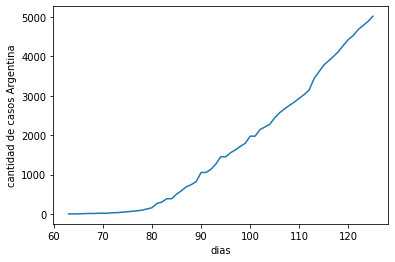

In [7]:
# En Argentina, los primeros contagios, fueron registrados a los 63 dias:
casos_principio_arg=casos_arg[63:126]
dias_principio_arg=dias_arg[63:126]

plt.plot(dias_principio_arg,casos_principio_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos Argentina')

Es difícil determinar si esta parte es exponencial. Analicemos qué pasa en escala logarítmica.

Text(0, 0.5, 'log cantidad de casos Argentina')

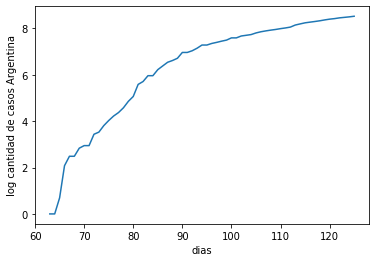

In [8]:
plt.plot(dias_principio_arg,np.log(casos_principio_arg))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos Argentina')

Mejor nos quedamos con lo que sucede entre los días 31 y 55, ya que ese fue el comportamiento más sostenido.

Text(0, 0.5, 'cantidad de casos Argentina')

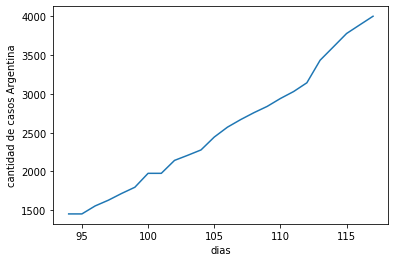

In [9]:
casos_principio_arg=casos_arg[94:118]
dias_principio_arg=dias_arg[94:118]

plt.plot(dias_principio_arg,casos_principio_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos Argentina')

Text(0, 0.5, 'log cantidad de casos Argentina')

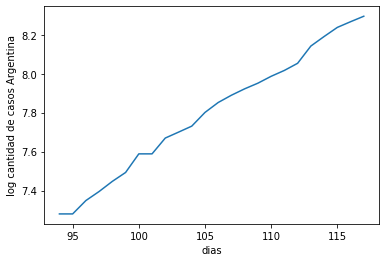

In [10]:
plt.plot(dias_principio_arg,np.log(casos_principio_arg))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos Argentina')

¡Se ve bastante lineal! Aprovechemos esto para averiguar el $k$, utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$



In [11]:
#definimos función para ajustar modelo
def exponencial(t_arg,k_arg,t0_arg):
  C=np.exp(k_arg*(t_arg-t0_arg))
  return C

In [12]:
#ajustamos con el fin de encontrar los parametros optimos hallados (popt), y la matriz de covarianza de parametros hallados (pcov):
popt_arg, pcov_arg = curve_fit(exponencial, dias_principio_arg, casos_principio_arg)
popt_arg, pcov_arg

(array([ 4.45251481e-02, -6.96476750e+01]),
 array([[4.57388171e-07, 1.84002867e-03],
        [1.84002867e-03, 7.41117907e+00]]))

Veamos cómo se ajusta lo que obtuvimos a los datos reales

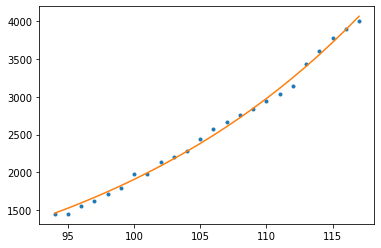

In [13]:
k_arg=popt_arg[0]
t0_arg=popt_arg[1]
casos_simu=exponencial(dias_principio_arg,k_arg,t0_arg)
plt.plot(dias_principio_arg,casos_principio_arg,'.')
plt.plot(dias_principio_arg,casos_simu)

In [14]:
k_arg

0.04452514813257092

Como última pista, hagamos una función que determine los casos nuevos por día a partir de estas curvas. Puede ser útil para tu análisis.

In [15]:
def casos_nuevos(casos):
  nuevos=np.zeros(len(casos))
  i=0
  while i<len(nuevos)-1:
    nuevos[i]=casos[i+1]-casos[i]
    i=i+1

  return nuevos   

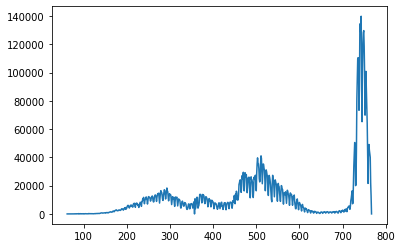

In [16]:
casos_arg=np.array(casos_arg)
nuevos_arg=casos_nuevos(casos_arg)
plt.plot(nuevos_arg)

### 1. Se seguira el analisis con el pais en donde inicio la pandemia y con otros del norte: China

Text(0, 0.5, 'cantidad de casos China')

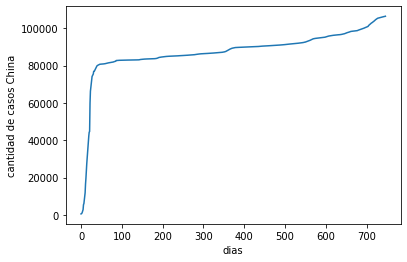

In [17]:
ind_china=np.where(paises=='China')
ind_china=ind_china[0]
casos_china=confirmados[ind_china]
dias_china=np.arange(0,len(casos_china))
plt.plot(dias_china,casos_china)
plt.xlabel('dias')
plt.ylabel('cantidad de casos China')

Text(0, 0.5, 'cantidad de casos China')

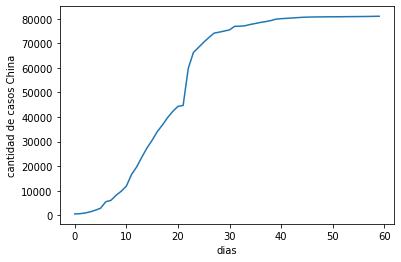

In [18]:
# En china los contagios arrancan desde el primer dia, y se analizaran sus primero 60 dias en donde se puede observar la tendencia del k inicial:
casos_principio_china=casos_china[0:60]
dias_principio_china=dias_china[0:60]

plt.plot(dias_principio_china,casos_principio_china)
plt.xlabel('dias')
plt.ylabel('cantidad de casos China')

In [19]:
#definimos función para ajustar modelo
def exponencial(t_china,k_china,t0_china):
  C=np.exp(k_china*(t_china-t0_china))
  return C

In [20]:
#ajustamos con el fin de encontrar los parametros optimos hallados (popt), y la matriz de covarianza de parametros hallados (pcov):
popt_china, pcov_china = curve_fit(exponencial, dias_principio_china, casos_principio_china)
popt_china, pcov_china

(array([ 2.27414802e-02, -4.48780635e+02]),
 array([[6.49493502e-06, 1.40101275e-01],
        [1.40101275e-01, 3.02479555e+03]]))

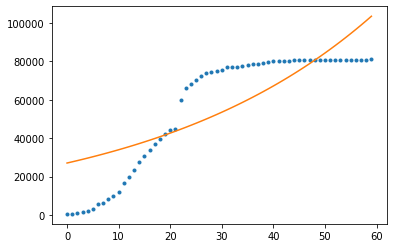

In [21]:
k_china=popt_china[0]
t0_china=popt_china[1]
casos_simu=exponencial(dias_principio_china,k_china,t0_china)
plt.plot(dias_principio_china,casos_principio_china,'.')
plt.plot(dias_principio_china,casos_simu)

In [22]:
# K de china
k_china

0.02274148020897167

### 2. USA

Text(0, 0.5, 'cantidad de casos USA')

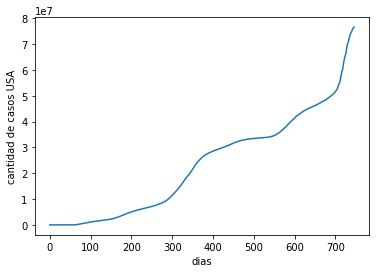

In [23]:
ind_usa=np.where(paises=='United States')
ind_usa=ind_usa[0]
casos_usa=confirmados[ind_usa]
dias_usa=np.arange(0,len(casos_usa))
plt.plot(dias_usa,casos_usa)
plt.xlabel('dias')
plt.ylabel('cantidad de casos USA')

Text(0, 0.5, 'cantidad de casos USA')

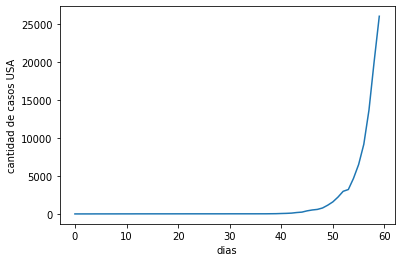

In [24]:
# En china los contagios arrancan desde el primer dia, y se analizaran sus primero 60 dias en donde se puede observar la tendencia del k inicial:
casos_principio_usa=casos_usa[0:60]
dias_principio_usa=dias_usa[0:60]

plt.plot(dias_principio_usa,casos_principio_usa)
plt.xlabel('dias')
plt.ylabel('cantidad de casos USA')

In [25]:
#definimos función para ajustar modelo
def exponencial(t_usa,k_usa,t0_usa):
  C=np.exp(k_usa*(t_usa-t0_usa))
  return C

In [26]:
#ajustamos con el fin de encontrar los parametros optimos hallados (popt), y la matriz de covarianza de parametros hallados (pcov):
popt_usa, pcov_usa = curve_fit(exponencial, dias_principio_usa, casos_principio_usa)
popt_usa, pcov_usa

(array([ 0.3341498 , 28.52034268]),
 array([[1.45671778e-05, 1.28290765e-03],
        [1.28290765e-03, 1.13265068e-01]]))

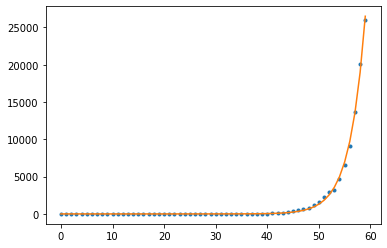

In [27]:
k_usa=popt_usa[0]
t0_usa=popt_usa[1]
casos_simu=exponencial(dias_principio_usa,k_usa,t0_usa)
plt.plot(dias_principio_usa,casos_principio_usa,'.')
plt.plot(dias_principio_usa,casos_simu)

In [28]:
# K de usa
k_usa

0.3341497977062525

### 3. GERMANY

Text(0, 0.5, 'cantidad de casos GERMANY')

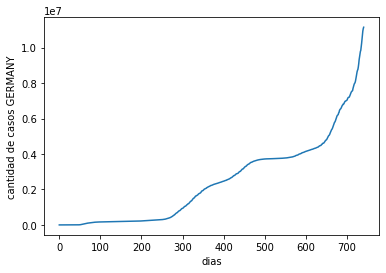

In [29]:
ind_ger=np.where(paises=='Germany')
ind_ger=ind_ger[0]
casos_ger=confirmados[ind_ger]
dias_ger=np.arange(0,len(casos_ger))
plt.plot(dias_ger,casos_ger)
plt.xlabel('dias')
plt.ylabel('cantidad de casos GERMANY')

Text(0, 0.5, 'cantidad de casos GERMANY')

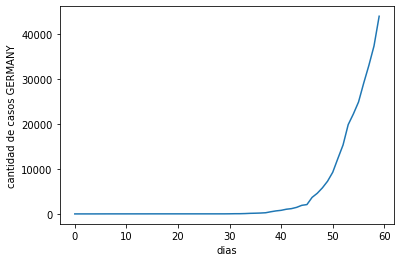

In [30]:
casos_principio_ger=casos_ger[0:60]
dias_principio_ger=dias_ger[0:60]

plt.plot(dias_principio_ger,casos_principio_ger)
plt.xlabel('dias')
plt.ylabel('cantidad de casos GERMANY')

In [31]:
#definimos función para ajustar modelo
def exponencial(t_ger,k_ger,t0_ger):
  C=np.exp(k_ger*(t_ger-t0_ger))
  return C

In [32]:
#ajustamos con el fin de encontrar los parametros optimos hallados (popt), y la matriz de covarianza de parametros hallados (pcov):
popt_ger, pcov_ger = curve_fit(exponencial, dias_principio_ger, casos_principio_ger)
popt_ger, pcov_ger

(array([ 0.17004873, -4.12667724]),
 array([[1.53739863e-05, 5.48388994e-03],
        [5.48388994e-03, 1.96065186e+00]]))

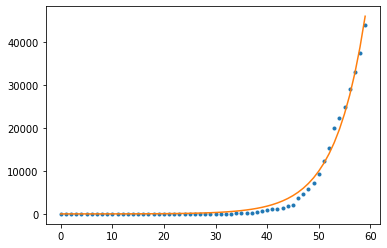

In [33]:
k_ger=popt_ger[0]
t0_ger=popt_ger[1]
casos_simu=exponencial(dias_principio_ger,k_ger,t0_ger)
plt.plot(dias_principio_ger,casos_principio_ger,'.')
plt.plot(dias_principio_ger,casos_simu)

In [34]:
# K de germany
k_ger

0.17004873280512295

### 4. RUSSIA

Text(0, 0.5, 'cantidad de casos RUSIA')

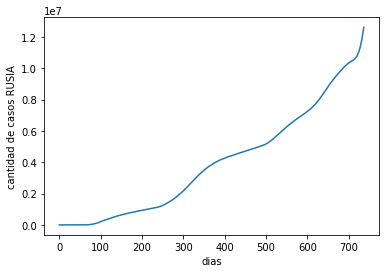

In [35]:
ind_rus=np.where(paises=='Russia')
ind_rus=ind_rus[0]
casos_rus=confirmados[ind_rus]
dias_rus=np.arange(0,len(casos_rus))
plt.plot(dias_rus,casos_rus)
plt.xlabel('dias')
plt.ylabel('cantidad de casos RUSIA')

Text(0, 0.5, 'cantidad de casos RUSIA')

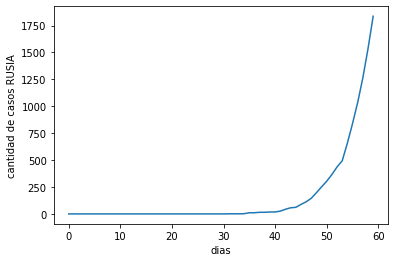

In [36]:
casos_principio_rus=casos_rus[0:60]
dias_principio_rus=dias_rus[0:60]

plt.plot(dias_principio_rus,casos_principio_rus)
plt.xlabel('dias')
plt.ylabel('cantidad de casos RUSIA')

In [37]:
#definimos función para ajustar modelo
def exponencial(t_rus,k_rus,t0_rus):
  C=np.exp(k_rus*(t_rus-t0_rus))
  return C

In [38]:
#ajustamos con el fin de encontrar los parametros optimos hallados (popt), y la matriz de covarianza de parametros hallados (pcov):
popt_rus, pcov_rus = curve_fit(exponencial, dias_principio_rus, casos_principio_rus)
popt_rus, pcov_rus

(array([ 0.20641065, 22.49912791]),
 array([[2.38588022e-06, 3.99290739e-04],
        [3.99290739e-04, 6.71475588e-02]]))

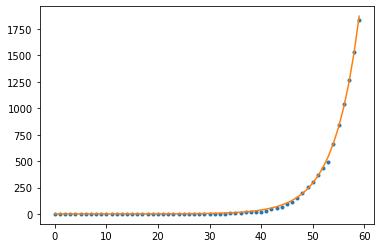

In [39]:
k_rus=popt_rus[0]
t0_rus=popt_rus[1]
casos_simu=exponencial(dias_principio_rus,k_rus,t0_rus)
plt.plot(dias_principio_rus,casos_principio_rus,'.')
plt.plot(dias_principio_rus,casos_simu)

In [40]:
# K de rusia
k_rus

0.20641065291234473

### 5. JAPAN

Text(0, 0.5, 'cantidad de casos JAPAN')

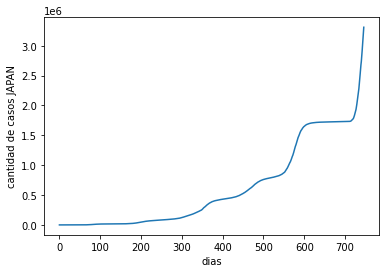

In [41]:
ind_jp=np.where(paises=='Japan')
ind_jp=ind_jp[0]
casos_jp=confirmados[ind_jp]
dias_jp=np.arange(0,len(casos_jp))
plt.plot(dias_jp,casos_jp)
plt.xlabel('dias')
plt.ylabel('cantidad de casos JAPAN')

Text(0, 0.5, 'cantidad de casos JAPAN')

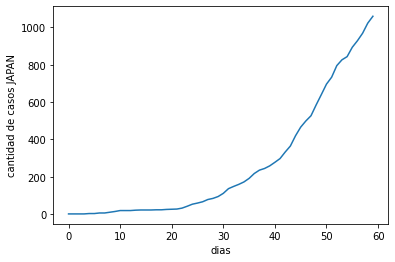

In [42]:
casos_principio_jp=casos_jp[0:60]
dias_principio_jp=dias_jp[0:60]

plt.plot(dias_principio_jp,casos_principio_jp)
plt.xlabel('dias')
plt.ylabel('cantidad de casos JAPAN')

In [43]:
#definimos función para ajustar modelo
def exponencial(t_jp,k_jp,t0_jp):
  C=np.exp(k_jp*(t_jp-t0_jp))
  return C

In [44]:
#ajustamos con el fin de encontrar los parametros optimos hallados (popt), y la matriz de covarianza de parametros hallados (pcov):
popt_jp, pcov_jp = curve_fit(exponencial, dias_principio_jp, casos_principio_jp)
popt_jp, pcov_jp

(array([  0.07258429, -38.39300502]),
 array([[3.27828871e-06, 4.11017225e-03],
        [4.11017225e-03, 5.18225668e+00]]))

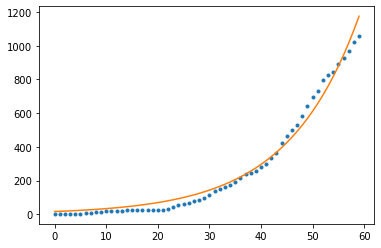

In [45]:
k_jp=popt_jp[0]
t0_jp=popt_jp[1]
casos_simu=exponencial(dias_principio_jp,k_jp,t0_jp)
plt.plot(dias_principio_jp,casos_principio_jp,'.')
plt.plot(dias_principio_jp,casos_simu)

In [46]:
# K de japon
k_jp

0.07258429017124206

### 6. UNITED KINGDOM

Text(0, 0.5, 'cantidad de casos United Kingdom')

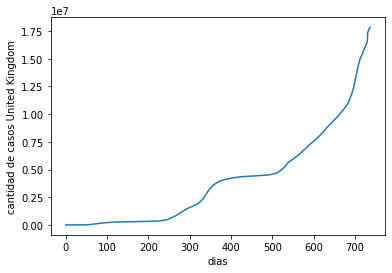

In [47]:
ind_uk=np.where(paises=='United Kingdom')
ind_uk=ind_uk[0]
casos_uk=confirmados[ind_uk]
dias_uk=np.arange(0,len(casos_uk))
plt.plot(dias_uk,casos_uk)
plt.xlabel('dias')
plt.ylabel('cantidad de casos United Kingdom')

Text(0, 0.5, 'cantidad de casos United Kingdom')

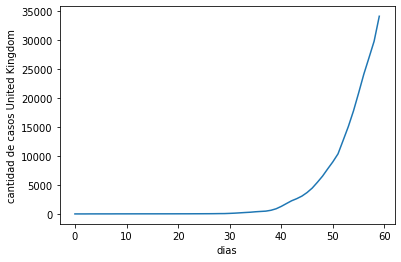

In [48]:
casos_principio_uk=casos_uk[0:60]
dias_principio_uk=dias_uk[0:60]

plt.plot(dias_principio_uk,casos_principio_uk)
plt.xlabel('dias')
plt.ylabel('cantidad de casos United Kingdom')

In [49]:
#definimos función para ajustar modelo
def exponencial(t_uk,k_uk,t0_uk):
  C=np.exp(k_uk*(t_uk-t0_uk))
  return C

In [50]:
#ajustamos con el fin de encontrar los parametros optimos hallados (popt), y la matriz de covarianza de parametros hallados (pcov):
popt_uk, pcov_uk = curve_fit(exponencial, dias_principio_uk, casos_principio_uk)
popt_uk, pcov_uk

(array([ 0.15212741, -9.91384351]),
 array([[5.27465507e-06, 2.29187974e-03],
        [2.29187974e-03, 9.98283129e-01]]))

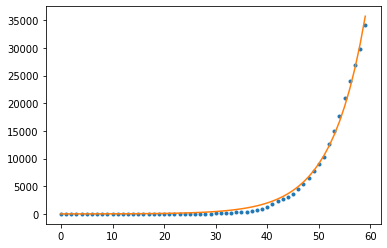

In [51]:
k_uk=popt_uk[0]
t0_uk=popt_uk[1]
casos_simu=exponencial(dias_principio_uk,k_uk,t0_uk)
plt.plot(dias_principio_uk,casos_principio_uk,'.')
plt.plot(dias_principio_uk,casos_simu)

In [52]:
# K de uk
k_uk

0.1521274074241873

### 7. ITALY

Text(0, 0.5, 'cantidad de casos ITALY')

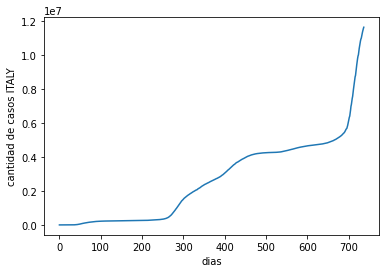

In [53]:
ind_it=np.where(paises=='Italy')
ind_it=ind_it[0]
casos_it=confirmados[ind_it]
dias_it=np.arange(0,len(casos_it))
plt.plot(dias_it,casos_it)
plt.xlabel('dias')
plt.ylabel('cantidad de casos ITALY')

Text(0, 0.5, 'cantidad de casos ITALY')

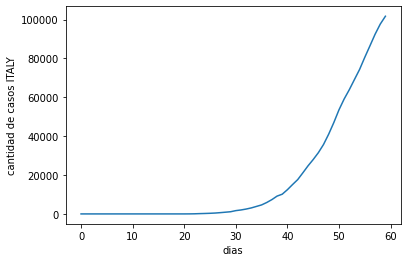

In [54]:
casos_principio_it=casos_it[0:60]
dias_principio_it=dias_it[0:60]

plt.plot(dias_principio_it,casos_principio_it)
plt.xlabel('dias')
plt.ylabel('cantidad de casos ITALY')

In [55]:
#definimos función para ajustar modelo
def exponencial(t_it,k_it,t0_it):
  C=np.exp(k_it*(t_it-t0_it))
  return C

In [56]:
#ajustamos con el fin de encontrar los parametros optimos hallados (popt), y la matriz de covarianza de parametros hallados (pcov):
popt_it, pcov_it = curve_fit(exponencial, dias_principio_it, casos_principio_it)
popt_it, pcov_it

(array([  0.10163528, -55.61073873]),
 array([[9.40795705e-06, 1.01979553e-02],
        [1.01979553e-02, 1.10762388e+01]]))

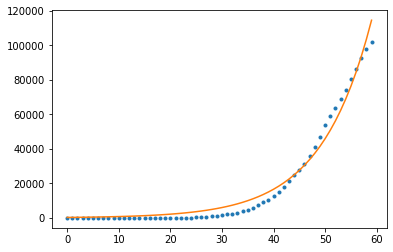

In [57]:
k_it=popt_it[0]
t0_it=popt_it[1]
casos_simu=exponencial(dias_principio_it,k_it,t0_it)
plt.plot(dias_principio_it,casos_principio_it,'.')
plt.plot(dias_principio_it,casos_simu)

In [58]:
# K de it
k_it

0.10163528168005789

### 8. NETHERLANDS

Text(0, 0.5, 'cantidad de casos HOLANDA')

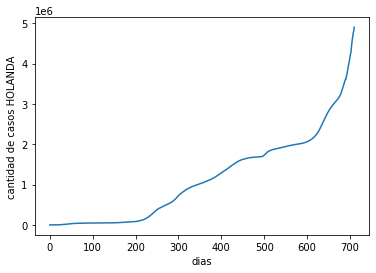

In [59]:
ind_ntl=np.where(paises=='Netherlands')
ind_ntl=ind_ntl[0]
casos_ntl=confirmados[ind_ntl]
dias_ntl=np.arange(0,len(casos_ntl))
plt.plot(dias_ntl,casos_ntl)
plt.xlabel('dias')
plt.ylabel("cantidad de casos HOLANDA")

Text(0, 0.5, 'cantidad de casos HOLANDA')

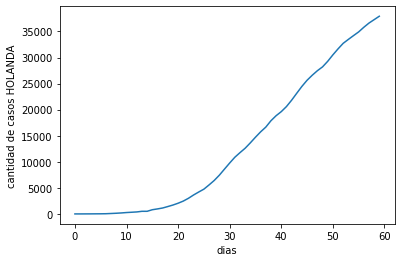

In [60]:
casos_principio_ntl=casos_ntl[0:60]
dias_principio_ntl=dias_ntl[0:60]

plt.plot(dias_principio_ntl,casos_principio_ntl)
plt.xlabel('dias')
plt.ylabel('cantidad de casos HOLANDA')

In [61]:
#definimos función para ajustar modelo
def exponencial(t_ntl,k_ntl,t0_ntl):
  C=np.exp(k_ntl*(t_ntl-t0_ntl))
  return C

In [62]:
#ajustamos con el fin de encontrar los parametros optimos hallados (popt), y la matriz de covarianza de parametros hallados (pcov):
popt_ntl, pcov_ntl = curve_fit(exponencial, dias_principio_ntl, casos_principio_ntl)
popt_ntl, pcov_ntl

(array([ 5.25295626e-02, -1.44841492e+02]),
 array([[5.63706365e-06, 2.09187640e-02],
        [2.09187640e-02, 7.77995523e+01]]))

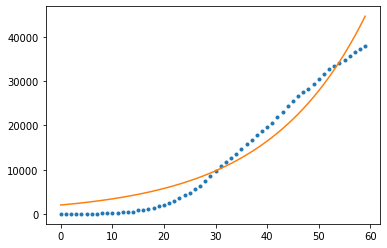

In [63]:
k_ntl=popt_ntl[0]
t0_ntl=popt_ntl[1]
casos_simu=exponencial(dias_principio_ntl,k_ntl,t0_ntl)
plt.plot(dias_principio_ntl,casos_principio_ntl,'.')
plt.plot(dias_principio_ntl,casos_simu)

In [64]:
# K de holanda
k_ntl

0.052529562573669634

### 9. CROATIA

Text(0, 0.5, 'cantidad de casos CROACIA')

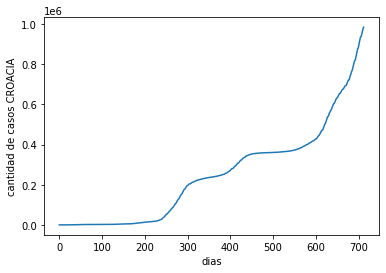

In [65]:
ind_crt=np.where(paises=='Croatia')
ind_crt=ind_crt[0]
casos_crt=confirmados[ind_crt]
dias_crt=np.arange(0,len(casos_crt))
plt.plot(dias_crt,casos_crt)
plt.xlabel('dias')
plt.ylabel('cantidad de casos CROACIA')

Text(0, 0.5, 'cantidad de casos CROACIA')

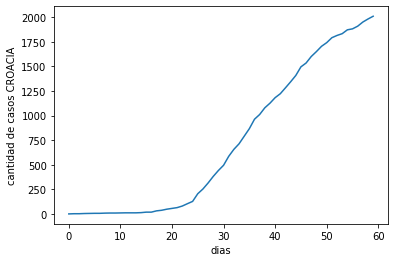

In [66]:
casos_principio_crt=casos_crt[0:60]
dias_principio_crt=dias_crt[0:60]

plt.plot(dias_principio_crt,casos_principio_crt)
plt.xlabel('dias')
plt.ylabel('cantidad de casos CROACIA')

In [67]:
#definimos función para ajustar modelo
def exponencial(t_crt,k_crt,t0_crt):
  C=np.exp(k_crt*(t_crt-t0_crt))
  return C

In [68]:
#ajustamos con el fin de encontrar los parametros optimos hallados (popt), y la matriz de covarianza de parametros hallados (pcov):
popt_crt, pcov_crt = curve_fit(exponencial, dias_principio_crt, casos_principio_crt)
popt_crt, pcov_crt

(array([ 5.15422947e-02, -9.24681911e+01]),
 array([[8.91717486e-06, 2.46342458e-02],
        [2.46342458e-02, 6.83442461e+01]]))

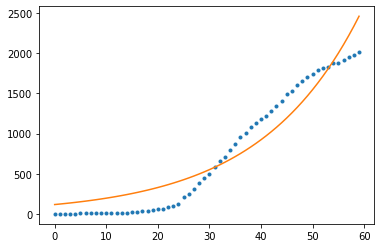

In [69]:
k_crt=popt_crt[0]
t0_crt=popt_crt[1]
casos_simu=exponencial(dias_principio_crt,k_crt,t0_crt)
plt.plot(dias_principio_crt,casos_principio_crt,'.')
plt.plot(dias_principio_crt,casos_simu)

In [70]:
# K de croatia
k_crt

0.05154229466679622

### 10. Ucrania

Text(0, 0.5, 'cantidad de casos UCRANIA')

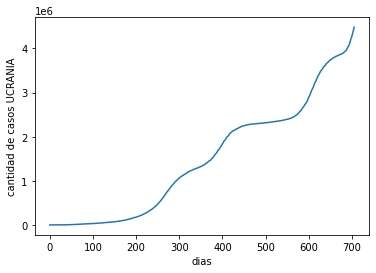

In [71]:
ind_ucr=np.where(paises=='Ukraine')
ind_ucr=ind_ucr[0]
casos_ucr=confirmados[ind_ucr]
dias_ucr=np.arange(0,len(casos_ucr))
plt.plot(dias_ucr,casos_ucr)
plt.xlabel('dias')
plt.ylabel('cantidad de casos UCRANIA')

Text(0, 0.5, 'cantidad de casos UCRANIA')

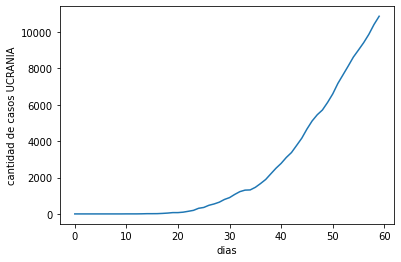

In [72]:
casos_principio_ucr=casos_ucr[0:60]
dias_principio_ucr=dias_ucr[0:60]

plt.plot(dias_principio_ucr,casos_principio_ucr)
plt.xlabel('dias')
plt.ylabel('cantidad de casos UCRANIA')

In [73]:
#definimos función para ajustar modelo
def exponencial(t_ucr,k_ucr,t0_ucr):
  C=np.exp(k_ucr*(t_ucr-t0_ucr))
  return C

In [74]:
#ajustamos con el fin de encontrar los parametros optimos hallados (popt), y la matriz de covarianza de parametros hallados (pcov):
popt_ucr, pcov_ucr = curve_fit(exponencial, dias_principio_ucr, casos_principio_ucr)
popt_ucr, pcov_ucr

(array([  0.07739586, -62.40825414]),
 array([[4.68963324e-06, 6.99498332e-03],
        [6.99498332e-03, 1.04659566e+01]]))

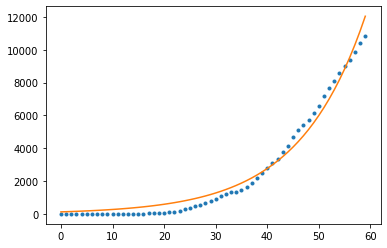

In [75]:
k_ucr=popt_ucr[0]
t0_ucr=popt_ucr[1]
casos_simu=exponencial(dias_principio_ucr,k_ucr,t0_ucr)
plt.plot(dias_principio_ucr,casos_principio_ucr,'.')
plt.plot(dias_principio_ucr,casos_simu)

In [76]:
# K de ucrania
k_ucr

0.07739586076899317

Text(0, 0.5, 'cantidad contagios')

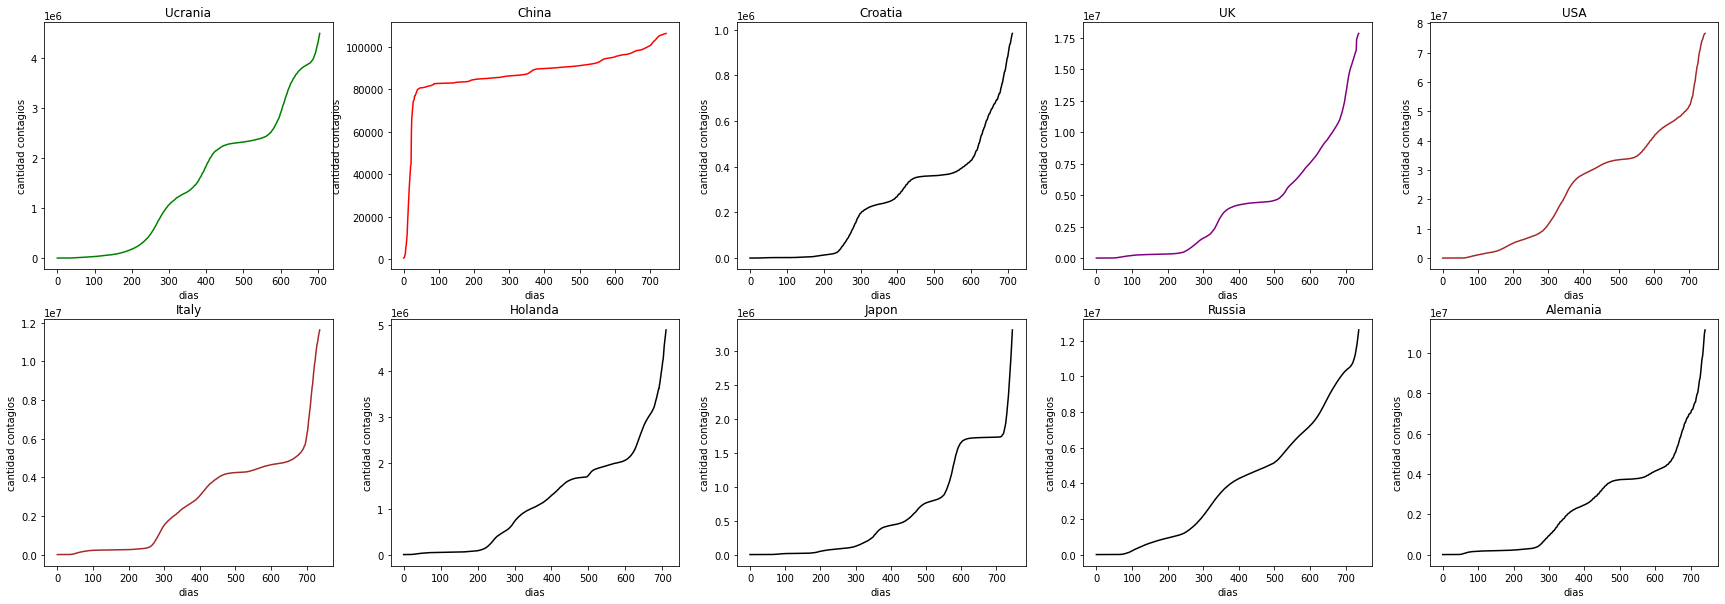

In [77]:
# A continuacion, se graficaran las 10 curvas que muestran la evolucion de la pandemia en cada uno de los paises: 
import matplotlib.pyplot as plt

plt.figure(figsize = (30,10))
plt.subplot(2,5,1)
plt.title("Ucrania")
plt.plot(dias_ucr, casos_ucr, color = "green")
plt.xlabel("dias")
plt.ylabel("cantidad contagios")

plt.subplot(2,5,2)
plt.title("China")
plt.plot(dias_china, casos_china, color = "red")
plt.xlabel("dias")
plt.ylabel("cantidad contagios")

plt.subplot(2,5,3)
plt.title("Croatia")
plt.plot(dias_crt, casos_crt, color = "black")
plt.xlabel("dias")
plt.ylabel("cantidad contagios")

plt.subplot(2,5,4)
plt.title("UK")
plt.plot(dias_uk, casos_uk, color = "purple")
plt.xlabel("dias")
plt.ylabel("cantidad contagios")

plt.subplot(2,5,5)
plt.title("USA")
plt.plot(dias_usa, casos_usa, color = "brown")
plt.xlabel("dias")
plt.ylabel("cantidad contagios")

plt.subplot(2,5,6)
plt.title("Italy")
plt.plot(dias_it, casos_it, color = "brown")
plt.xlabel("dias")
plt.ylabel("cantidad contagios")

plt.subplot(2,5,7)
plt.title("Holanda")
plt.plot(dias_ntl, casos_ntl, color = "black")
plt.xlabel("dias")
plt.ylabel("cantidad contagios")

plt.subplot(2,5,8)
plt.title("Japon")
plt.plot(dias_jp, casos_jp, color = "black")
plt.xlabel("dias")
plt.ylabel("cantidad contagios")

plt.subplot(2,5,9)
plt.title("Russia")
plt.plot(dias_rus, casos_rus, color = "black")
plt.xlabel("dias")
plt.ylabel("cantidad contagios")

plt.subplot(2,5,10)
plt.title("Alemania")
plt.plot(dias_ger, casos_ger, color = "black")
plt.xlabel("dias")
plt.ylabel("cantidad contagios")

##### Se observa el parecido en la curva de todas las graficas, exepto la de china, que fue en donde inicio todo el problema de la pandemnia. Tambien se observa en la grafica de china que los contagios fueron muchos en muly pocos dias y despues se logra estabilizar, evitando el crecimieto que se veia en sus primeros dias. El resto de los paises, tienen sus curvas muy similares, empiezan los contagios de una manera lenta y empiezan a subir con el paso del tiempo, como una funcion exponencial, la que se se puede suavizar por el metodo de minimos cuadrados, aunque la cantidad de contagios varia con cada pais, siendo USA con el mayor de los contagios.

#### Se generara un intervalo de confianza para el valor de k, que se estima en 10 paises analizados, con el objetivo de representar la poblacion mundial, para esto se usara la tecnica bootstraping o de resampling, con el fin de estimar un parametro y un error asociado, incluso cuando no se tiene idea de como es la distribucion de los datos. Se hallara la media y los intervalos de confianza:

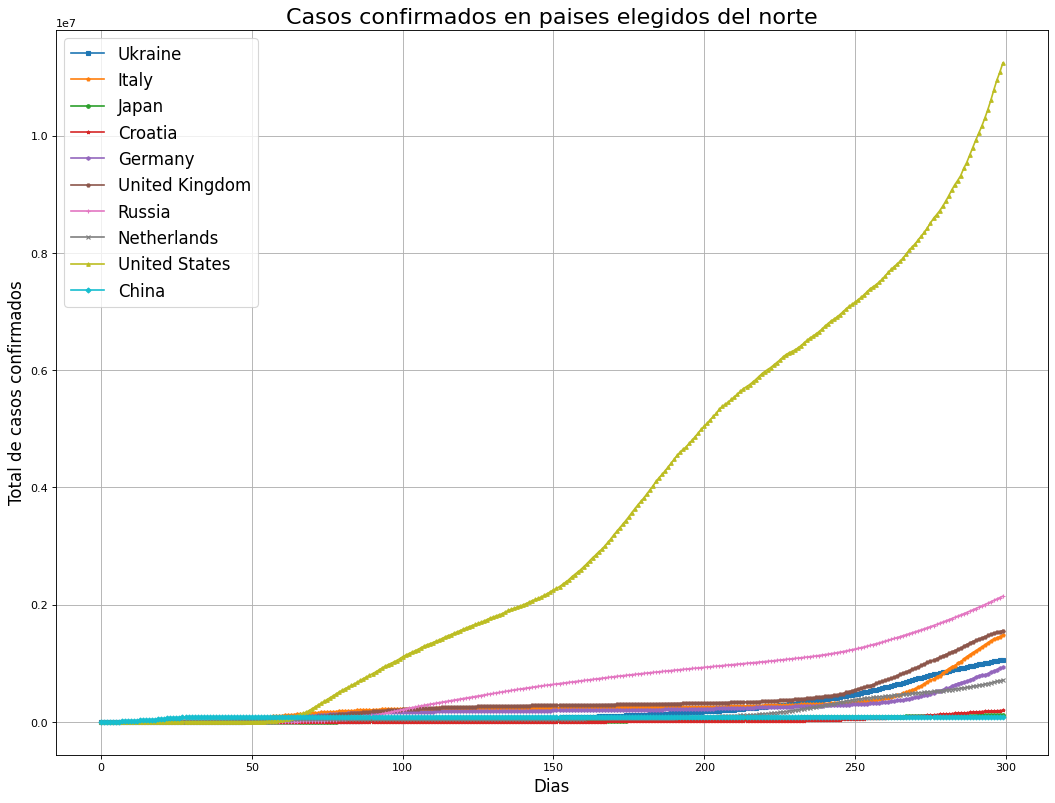

In [78]:
paises_n = ['Ukraine','Italy', 'Japan', 'Croatia', 'Germany', 'United Kingdom', 'Russia', 'Netherlands','United States', 'China']#, 'World' 'Canada',
data_select = datos[(datos['location'].isin(paises_n))]

i = 0
scale = 2
plt.figure(figsize=(8*scale, 6*scale), dpi=80)
marks = ["s","p","o","*","h","H","+","x","^","D",".","*","o"]

for pais in paises_n:
   casos_pais = data_select['total_cases'][(data_select.location == pais)][0:300]
   dias = np.arange(casos_pais.shape[0]) 
   plt.plot(dias,casos_pais,label = pais, marker = marks[i], markersize = 3.2)
   i = i + 1

plt.title('Casos confirmados en paises elegidos del norte', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)   
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total de casos confirmados', fontsize = 15)
plt.xlabel('Dias', fontsize = 15)
plt.grid()
plt.show()



In [79]:
k_all1 = np.array([k_ucr, k_china, k_crt, k_ger, k_it, k_jp, k_ntl, k_usa, k_uk, k_rus])
k_all1

array([0.07739586, 0.02274148, 0.05154229, 0.17004873, 0.10163528,
       0.07258429, 0.05252956, 0.3341498 , 0.15212741, 0.20641065])

In [80]:
# Por medio de las muestras que se obtuvieron del analisis de los 10 primeros paises, se realizara el metodo bootstrap con el fin de poder acercarse a la distribucion del estimador y poder obtener un
# intervalo de confianza a partir del estimador que sera su media: 
# El siguiente paso, se logro, gracias a la ayuda de https://www.cienciadedatos.net/documentos/pystats04-bootstrapping-python.html

def calcular_estadistico(x):
    estadistico = np.mean(x)
    
    return(estadistico)

In [81]:
# Se tomaran 9999 muestras de los k analizados en los primeros 10 paises del norte por el metodo de remuestreo, de la siguiente manera:

def bootstraping(x, fun_estadistico, n_iteraciones=9999):
   
    n = len(x)
    dist_boot = np.full(shape=n_iteraciones, fill_value=np.nan)
    
    for i in tqdm(range(n_iteraciones)):
        resample = np.random.choice(x, size=n, replace=True)
        dist_boot[i] = fun_estadistico(resample)
        
    return dist_boot

In [82]:
from tqdm import tqdm

dist_boot_norte = bootstraping(
            x = k_all1,
            fun_estadistico = calcular_estadistico,
            n_iteraciones   = 9999
            )


100%|██████████| 9999/9999 [00:00<00:00, 33558.78it/s]


In [83]:
# Intervalo IC basado en percentiles de la distribución bootstrapping
# ==============================================================================
# Un IC del 95% debe abarcar desde el cuantil 0.025 al 0.975
cuantiles_norte = np.quantile(a = dist_boot_norte, q = [0.025, 0.975])
print('-------------------------------')
print('Intervalo basado en percentiles')
print('-------------------------------')
print(cuantiles_norte)

-------------------------------
Intervalo basado en percentiles
-------------------------------
[0.07357581 0.18584458]


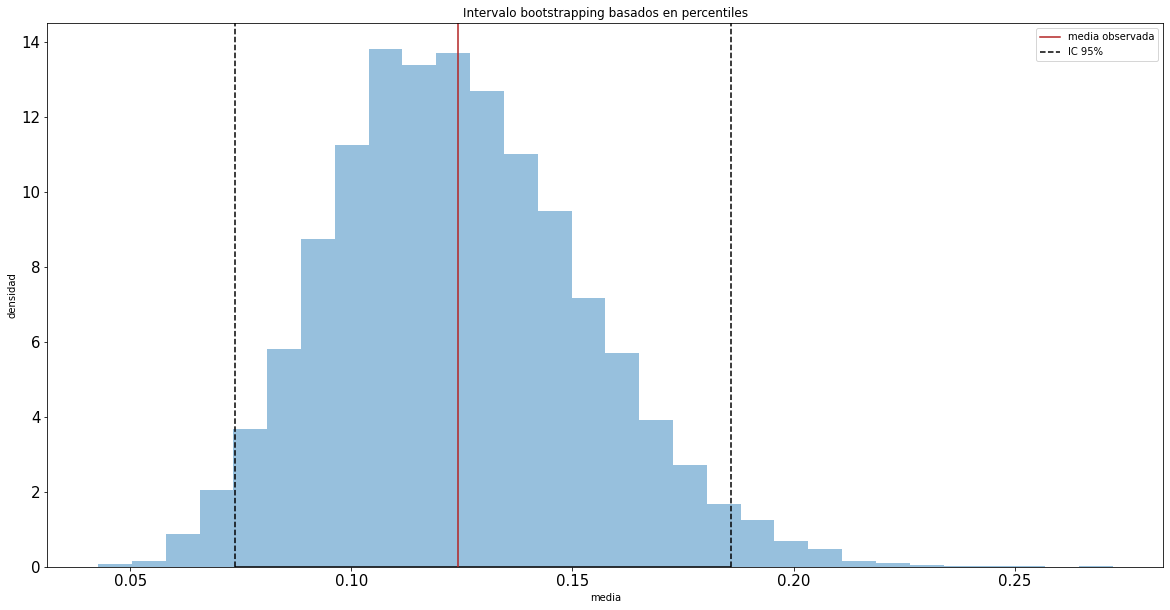

In [84]:
# Gráfico intervalo de confianza del 95%
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,10))
ax.hist(dist_boot_norte, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.axvline(x=k_all1.mean(), color='firebrick', label='media observada')
ax.axvline(x=cuantiles_norte[0], color='black', linestyle='--', label='IC 95%')
ax.axvline(x=cuantiles_norte[1], color='black', linestyle='--')
ax.hlines(y=0.001, xmin=cuantiles_norte[0], xmax=cuantiles_norte[1], color='black')
ax.set_title('Intervalo bootstrapping basados en percentiles')
ax.set_xlabel('media')
ax.set_ylabel('densidad')
ax.legend();



Text(0, 0.5, 'cantidad de casos Mundial')

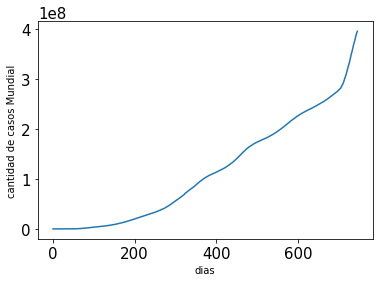

In [85]:
# Ahora se comparara el intervalo obtenido en los rangos intercuartiles con el k mundial, con el fin que de analizar si el k obtenido se puede generalizar con el k de la poblacion mundial. 
# Se realizaran los pasos anteriores para analizar su grafica:

ind_world=np.where(paises=='World')
ind_world=ind_world[0]
casos_world=confirmados[ind_world]
dias=np.arange(0,len(casos_world))
plt.plot(dias,casos_world)
plt.xlabel('dias')
plt.ylabel('cantidad de casos Mundial')


Text(0, 0.5, 'cantidad de casos Mundial')

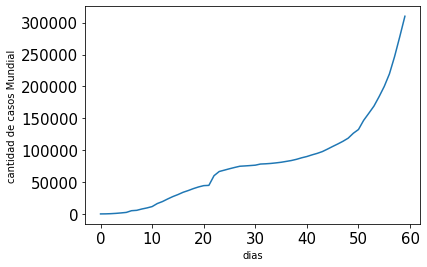

In [86]:
casos_principio_world=casos_world[0:60]
dias_principio_world=dias[0:60]

plt.plot(dias_principio_world,casos_principio_world)
plt.xlabel('dias')
plt.ylabel('cantidad de casos Mundial')

In [87]:
#definimos función para ajustar modelo
def exponencial(t_world,k_world,t0_world):
  C=np.exp(k_world*(t_world-t0_world))
  return C

In [88]:
#ajustamos con el fin de encontrar los parametros optimos hallados (popt), y la matriz de covarianza de parametros hallados (pcov):
popt_world, pcov_world = curve_fit(exponencial, dias_principio_world, casos_principio_world)
popt_world, pcov_world

(array([ 5.11744270e-02, -1.84225178e+02]),
 array([[5.46120576e-06, 2.49788776e-02],
        [2.49788776e-02, 1.14432941e+02]]))

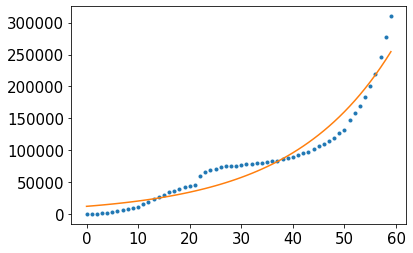

In [89]:
k_world=popt_world[0]
t0_world=popt_world[1]
casos_simu=exponencial(dias_principio_world,k_world,t0_world)
plt.plot(dias_principio_world,casos_principio_world,'.')
plt.plot(dias_principio_world,casos_simu)

In [90]:
# K MUNDIAL
k_world

0.05117442701706446

##### Con lo anterior se puede observar que los 10 paises elegidos no son representativos de acuerdo a los intervalos de confianza obtenidos y el k mundial queda afuera del intervalo. Para un 95% de confiabilidad, los intevalos de confianza son; [0.07428605 0.18588325] y el k mundial obtenido es: 0.05117442701706446.
##### Por lo que se analizaran otros paises que no seran los del norte:

### BRAZIL

Text(0, 0.5, 'cantidad de casos BRZIL')

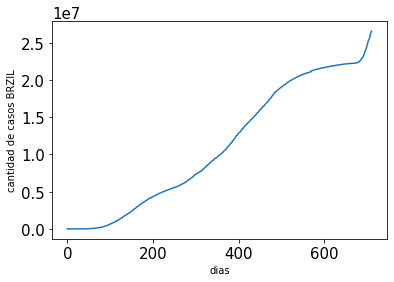

In [91]:
ind_bz=np.where(paises=='Brazil')
ind_bz=ind_bz[0]
casos_bz=confirmados[ind_bz]
dias=np.arange(0,len(casos_bz))
plt.plot(dias,casos_bz)
plt.xlabel('dias')
plt.ylabel('cantidad de casos BRZIL')

Text(0, 0.5, 'cantidad de casos BRAZIL')

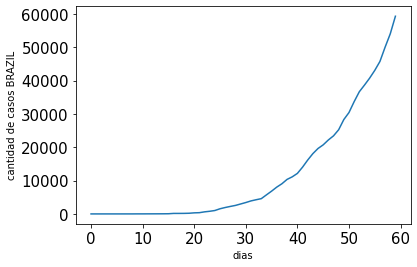

In [92]:
casos_principio_bz=casos_bz[0:60]
dias_principio_bz=dias[0:60]

plt.plot(dias_principio_bz,casos_principio_bz)
plt.xlabel('dias')
plt.ylabel('cantidad de casos BRAZIL')

In [93]:
#definimos función para ajustar modelo
def exponencial(t_bz,k_bz,t0_bz):
  C=np.exp(k_bz*(t_bz-t0_bz))
  return C

In [94]:
#ajustamos con el fin de encontrar los parametros optimos hallados (popt), y la matriz de covarianza de parametros hallados (pcov):
popt_bz, pcov_bz = curve_fit(exponencial, dias_principio_bz, casos_principio_bz)
popt_bz, pcov_bz

(array([  0.08453696, -71.38192191]),
 array([[3.04224743e-06, 4.49674323e-03],
        [4.49674323e-03, 6.66142799e+00]]))

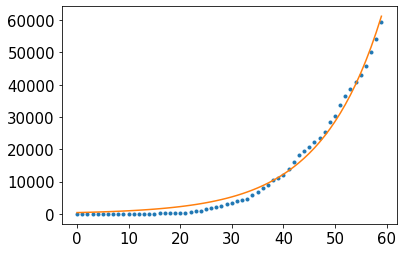

In [95]:
k_bz=popt_bz[0]
t0_bz=popt_bz[1]
casos_simu=exponencial(dias_principio_bz,k_bz,t0_bz)
plt.plot(dias_principio_bz,casos_principio_bz,'.')
plt.plot(dias_principio_bz,casos_simu)

In [96]:
# K de brazil
k_bz

0.08453696432999872

### COLOMBIA

Text(0, 0.5, 'cantidad de casos COLOMBIA')

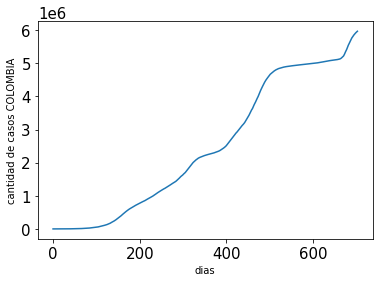

In [97]:
ind_col=np.where(paises=='Colombia')
ind_col=ind_col[0]
casos_col=confirmados[ind_col]
dias=np.arange(0,len(casos_col))
plt.plot(dias,casos_col)
plt.xlabel('dias')
plt.ylabel('cantidad de casos COLOMBIA')

Text(0, 0.5, 'cantidad de casos COLOMBIA')

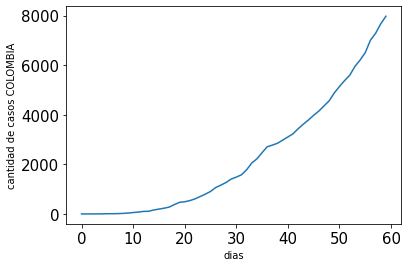

In [98]:
casos_principio_col=casos_col[0:60]
dias_principio_col=dias[0:60]
plt.plot(dias_principio_col,casos_principio_col)
plt.xlabel('dias')
plt.ylabel('cantidad de casos COLOMBIA')

In [99]:
#definimos función para ajustar modelo
def exponencial(t_col,k_col,t0_col):
  C=np.exp(k_col*(t_col-t0_col))
  return C

In [100]:
#ajustamos con el fin de encontrar los parametros optimos hallados (popt), y la matriz de covarianza de parametros hallados (pcov):
popt_col, pcov_col = curve_fit(exponencial, dias_principio_col, casos_principio_col)
popt_col, pcov_col

(array([ 5.88231971e-02, -9.47080451e+01]),
 array([[2.28094882e-06, 5.65168962e-03],
        [5.65168962e-03, 1.40491738e+01]]))

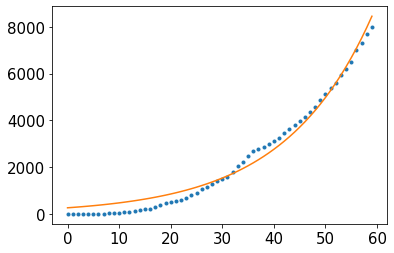

In [101]:
k_col=popt_col[0]
t0_col=popt_col[1]
casos_simu=exponencial(dias_principio_col,k_col,t0_col)
plt.plot(dias_principio_col,casos_principio_col,'.')
plt.plot(dias_principio_col,casos_simu)

In [102]:
# K de colombia
k_col

0.0588231970831277

### PERU

Text(0, 0.5, 'cantidad de casos PERU')

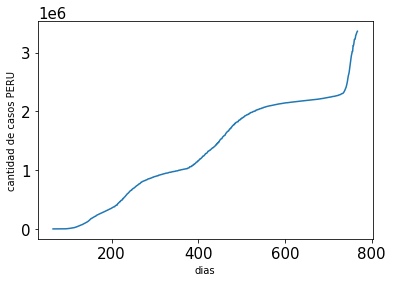

In [103]:
ind_per=np.where(paises=='Peru')
ind_per=ind_per[0]
casos_per=confirmados[ind_per]
dias=np.arange(0,len(casos_per))
plt.plot(dias,casos_per)
plt.xlabel('dias')
plt.ylabel('cantidad de casos PERU')

Text(0, 0.5, 'cantidad de casos PERU')

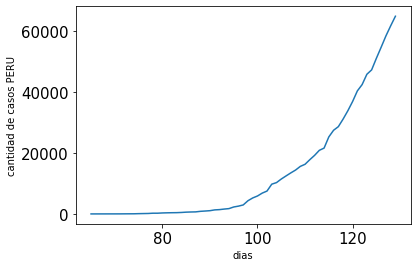

In [104]:
casos_principio_per=casos_per[65:130]
dias_principio_per=dias[65:130]

plt.plot(dias_principio_per,casos_principio_per)
plt.xlabel('dias')
plt.ylabel('cantidad de casos PERU')

In [105]:
#definimos función para ajustar modelo
def exponencial(t_per,k_per,t0_per):
  C=np.exp(k_per*(t_per-t0_per))
  return C

In [106]:
#ajustamos con el fin de encontrar los parametros optimos hallados (popt), y la matriz de covarianza de parametros hallados (pcov):
popt_per, pcov_per = curve_fit(exponencial, dias_principio_per, casos_principio_per)
popt_per, pcov_per

(array([  0.07732348, -15.17412229]),
 array([[2.04666111e-06, 3.65785545e-03],
        [3.65785545e-03, 6.55165325e+00]]))

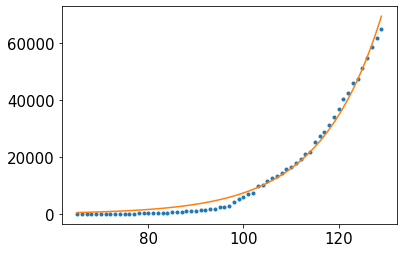

In [107]:
k_per=popt_per[0]
t0_per=popt_per[1]
casos_simu=exponencial(dias_principio_per,k_per,t0_per)
plt.plot(dias_principio_per,casos_principio_per,'.')
plt.plot(dias_principio_per,casos_simu)

In [108]:
# K de peru
k_per

0.07732347756047724

### MEXICO

Text(0, 0.5, 'cantidad de casos MEXICO')

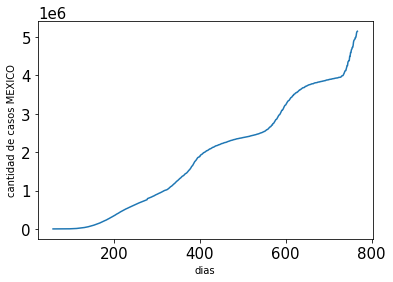

In [109]:
ind_mex=np.where(paises=='Mexico')
ind_mex=ind_mex[0]
casos_mex=confirmados[ind_mex]
dias=np.arange(0,len(casos_mex))
plt.plot(dias,casos_mex)
plt.xlabel('dias')
plt.ylabel('cantidad de casos MEXICO')

Text(0, 0.5, 'cantidad de casos MEXICO')

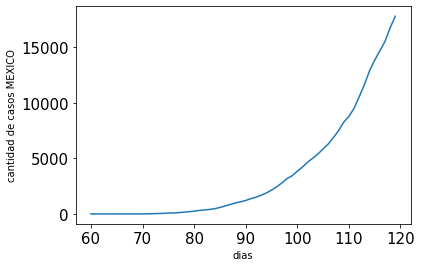

In [110]:
casos_principio_mex=casos_mex[60:120]
dias_principio_mex=dias[60:120]

plt.plot(dias_principio_mex,casos_principio_mex)
plt.xlabel('dias')
plt.ylabel('cantidad de casos MEXICO')

In [111]:
#definimos función para ajustar modelo
def exponencial(t_mex,k_mex,t0_mex):
  C=np.exp(k_mex*(t_mex-t0_mex))
  return C

In [112]:
#ajustamos con el fin de encontrar los parametros optimos hallados (popt), y la matriz de covarianza de parametros hallados (pcov):
popt_mex, pcov_mex = curve_fit(exponencial, dias_principio_mex, casos_principio_mex)
popt_mex, pcov_mex

(array([0.0860696 , 4.66919772]),
 array([[1.49398137e-06, 1.89212908e-03],
        [1.89212908e-03, 2.40314873e+00]]))

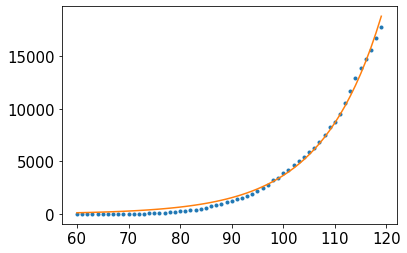

In [113]:
k_mex=popt_mex[0]
t0_mex=popt_mex[1]
casos_simu=exponencial(dias_principio_mex,k_mex,t0_mex)
plt.plot(dias_principio_mex,casos_principio_mex,'.')
plt.plot(dias_principio_mex,casos_simu)

In [114]:
# K de mexico
k_mex

0.08606959900358202

### ANGOLA

Text(0, 0.5, 'cantidad de casos ANGOLA')

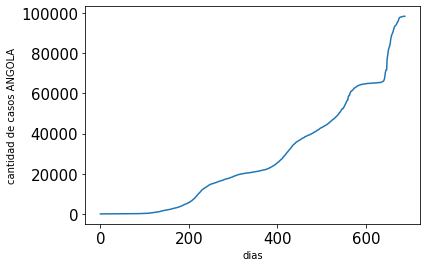

In [115]:
ind_ang=np.where(paises=='Angola')
ind_ang=ind_ang[0]
casos_ang=confirmados[ind_ang]
dias=np.arange(0,len(casos_ang))
plt.plot(dias,casos_ang)
plt.xlabel('dias')
plt.ylabel('cantidad de casos ANGOLA')

Text(0, 0.5, 'cantidad de casos ANGOLA')

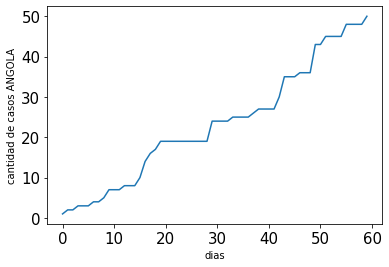

In [116]:
casos_principio_ang=casos_ang[0:60]
dias_principio_ang=dias[0:60]

plt.plot(dias_principio_ang,casos_principio_ang)
plt.xlabel('dias')
plt.ylabel('cantidad de casos ANGOLA')

In [117]:
#definimos función para ajustar modelo
def exponencial(t_ang,k_ang,t0_ang):
  C=np.exp(k_ang*(t_ang-t0_ang))
  return C

In [118]:
#ajustamos con el fin de encontrar los parametros optimos hallados (popt), y la matriz de covarianza de parametros hallados (pcov):
popt_ang, pcov_ang = curve_fit(exponencial, dias_principio_ang, casos_principio_ang)
popt_ang, pcov_ang

(array([ 3.41453160e-02, -5.82147943e+01]),
 array([[1.62151364e-06, 4.94245216e-03],
        [4.94245216e-03, 1.52769036e+01]]))

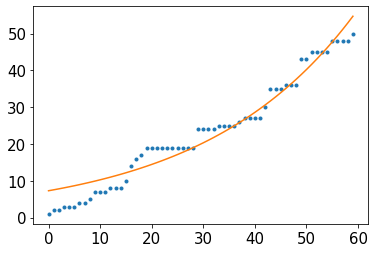

In [119]:
k_ang=popt_ang[0]
t0_ang=popt_ang[1]
casos_simu=exponencial(dias_principio_ang,k_ang,t0_ang)
plt.plot(dias_principio_ang,casos_principio_ang,'.')
plt.plot(dias_principio_ang,casos_simu)

In [120]:
# K de angola
k_ang

0.0341453160273987

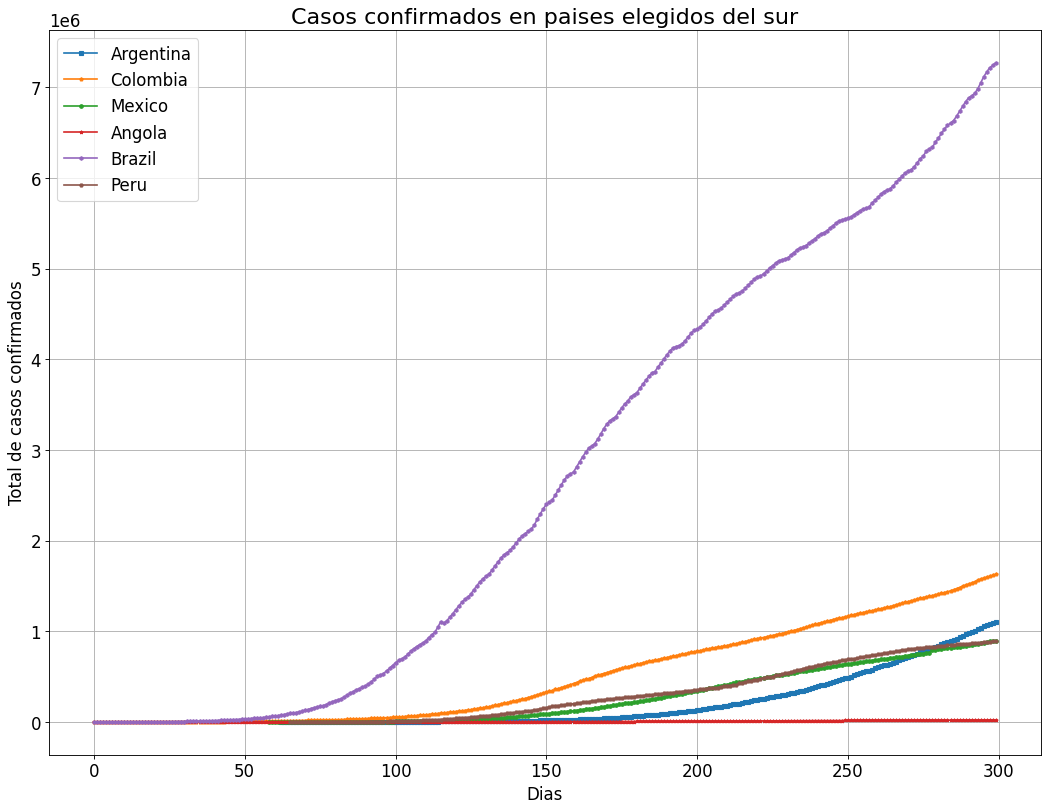

In [121]:
paises_n = ['Argentina','Colombia', 'Mexico', 'Angola', 'Brazil', 'Peru']
data_select = datos[(datos['location'].isin(paises_n))]

i = 0
scale = 2
plt.figure(figsize=(8*scale, 6*scale), dpi=80)
marks = ["s","p","o","*","h","H","+","x","^","D",".","*","o"]

for pais in paises_n:
   casos_pais = data_select['total_cases'][(data_select.location == pais)][0:300]
   dias = np.arange(casos_pais.shape[0]) 
   plt.plot(dias,casos_pais,label = pais, marker = marks[i], markersize = 3.2)
   i = i + 1

plt.title('Casos confirmados en paises elegidos del sur', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)   
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total de casos confirmados', fontsize = 15)
plt.xlabel('Dias', fontsize = 15)
plt.grid()
plt.show()

Intervalo de confianza con el k mundial y paises del sur a partir del metodo de remuestreo o bootstrap, visto anteriormente:

In [122]:
k_all2 = np.array([k_arg, k_col, k_mex, k_ang, k_bz, k_per])
k_all2

array([0.04452515, 0.0588232 , 0.0860696 , 0.03414532, 0.08453696,
       0.07732348])

In [123]:
def bootstraping(x, fun_estadistico, n_iteraciones=9999):
   
    n = len(x)
    dist_boot = np.full(shape=n_iteraciones, fill_value=np.nan)
    
    for i in tqdm(range(n_iteraciones)):
        resample = np.random.choice(x, size=n, replace=True)
        dist_boot[i] = fun_estadistico(resample)
        
    return dist_boot

In [124]:
dist_boot_sur = bootstraping(
            x = k_all2,
            fun_estadistico = calcular_estadistico,
            n_iteraciones   = 9999
            )


100%|██████████| 9999/9999 [00:00<00:00, 32905.94it/s]


In [125]:
# Intervalo IC basado en percentiles de la distribución bootstrapping
# ==============================================================================
# Un IC del 95% debe abarcar desde el cuantil 0.025 al 0.975
cuantiles_sur = np.quantile(a = dist_boot_sur, q = [0.025, 0.975])
print('-------------------------------')
print('Intervalo basado en percentiles')
print('-------------------------------')
print(cuantiles_sur)

-------------------------------
Intervalo basado en percentiles
-------------------------------
[0.04756119 0.07955997]


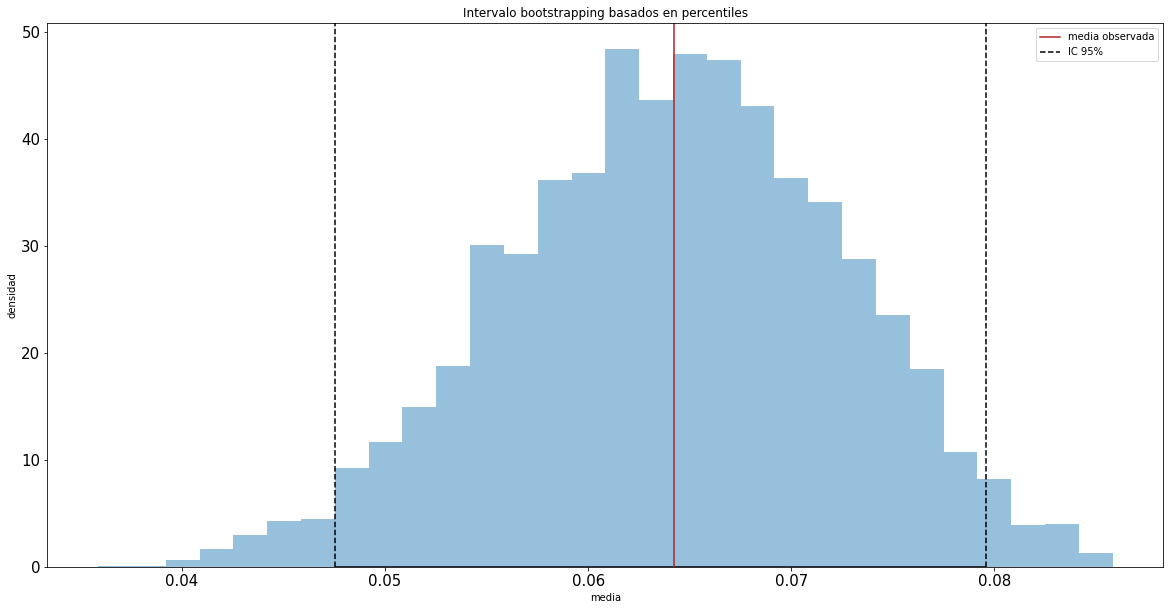

In [126]:
# Gráfico intervalo de confianza del 95%
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,10))
ax.hist(dist_boot_sur, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.axvline(x=k_all2.mean(), color='firebrick', label='media observada')
ax.axvline(x=cuantiles_sur[0], color='black', linestyle='--', label='IC 95%')
ax.axvline(x=cuantiles_sur[1], color='black', linestyle='--')
ax.hlines(y=0.001, xmin=cuantiles_sur[0], xmax=cuantiles_sur[1], color='black')
ax.set_title('Intervalo bootstrapping basados en percentiles')
ax.set_xlabel('media')
ax.set_ylabel('densidad')
ax.legend();



Al eliminar paises con un alto valor de K, e introducir paises del sur del planeta que tienen un k de menor valor, se observa que el k mundial si esta en el rango de confianza del k analizado: intervalo de confinza es [0.04798928 0.07955997] y k mundial obtenido es: 0.05117442701706446. 


### c. Responde: con que criterio elegiste los paises para elaborar el interalo de confianza de k?

Se eligieron los paises a partir de su ubicaion geografica, que son del norte de los continentes y que estuvieran proximos a China. Y se observa que el intervalo de confianza no representa el k de la poblacion mundial, por lo que se procede a buscar paises del sur de los continentes, con el fin de encontrar un k que no fuera tan elevado como en los paises del norte, con el fin de lograr que el k mundial si estuviera en el intervalo de confianza. 

### d. Responde: el k promedio que mediste a partir de una poblacion de paises, sirve para representar a la poblacion mundial?

Se observa que la tendencia a elegir paises del sur de los continentes es mas acertada para que el k mundial se encuentre en el rango de confianza hallado anteriormente. Pero se usara un test de hipotesis con el fin de garantizar la respuesta argumentada anteriormente:

In [127]:
# La siguiente prueba de hipotesis, se realiza con el fin de analizar si el intervalo de confianza y la media obtenidad con el k de paises del norte, es significativa para el k mundial, a partir 
# de la media e intervalo de confianza de los paises del sur: 
# Se formulan las hipotesis:
# H0 = no hay diferencia entre las medias poblacionales, k_all1 = k_all2
# H1 = no se cumple H0, k_all1 diferente k_all2

from scipy import stats
import math

# el nivel de significancia escogido es:
alpha = 0.05 

# se realiza el intervalo de confianza:
confianza = 1 - alpha

# se obtienen las medias y las desviaciones estandar de los paises del norte y del sur, a partir de la tecnica de bootstraping realizada a cada uno:
n_norte = len(dist_boot_norte)
media_norte = dist_boot_norte.mean()
std_norte = dist_boot_norte.std()

n_sur = len(dist_boot_sur)
media_sur = dist_boot_sur.mean()
std_sur = dist_boot_sur.std()

norte = std_norte / math.sqrt(n_norte) * stats.t.ppf((1 + confianza) / 2, n_norte - 1)
sur = std_sur / math.sqrt(n_sur) * stats.t.ppf((1 + confianza) / 2, n_sur - 1)

print('IC - Norte: ', media_norte - norte, media_norte + norte)
print('IC - Sur: ', media_sur - sur, media_sur + sur)


tprueba, pvalue = stats.ttest_ind(dist_boot_norte, dist_boot_sur, equal_var = False)

print('p-value = ', pvalue)

# se realiza la prueba de relacion:
if pvalue >= alpha: 
    print('no hay diferencia entre las medias poblacionales, k_all1 = k_all2 (acepta H0)') 
else: 
    print('no se cumple H0, k_all1 diferente k_all2 (rechaza H0)')

IC - Norte:  0.12355818714923299 0.12467762435921285
IC - Sur:  0.06403611739461076 0.0643580307641739
p-value =  0.0
no se cumple H0, k_all1 diferente k_all2 (rechaza H0)


Se observa que se rechaza H0, k_all1 diferente k_all2, segun el test de hipotesis realizado anteriormente, lo que indica que la muestra obtenida de los paises del norte no es representativa para ser comparada con el k mundial.

### e. Realiza al menos dos graficos que aporten información para el entendimiento e interpretacion de los datos:

Se realizara lo anterior a partir de dos graficas que mostraran los limites inferiores y superiores de los k del norte y del sur y el k mundial:

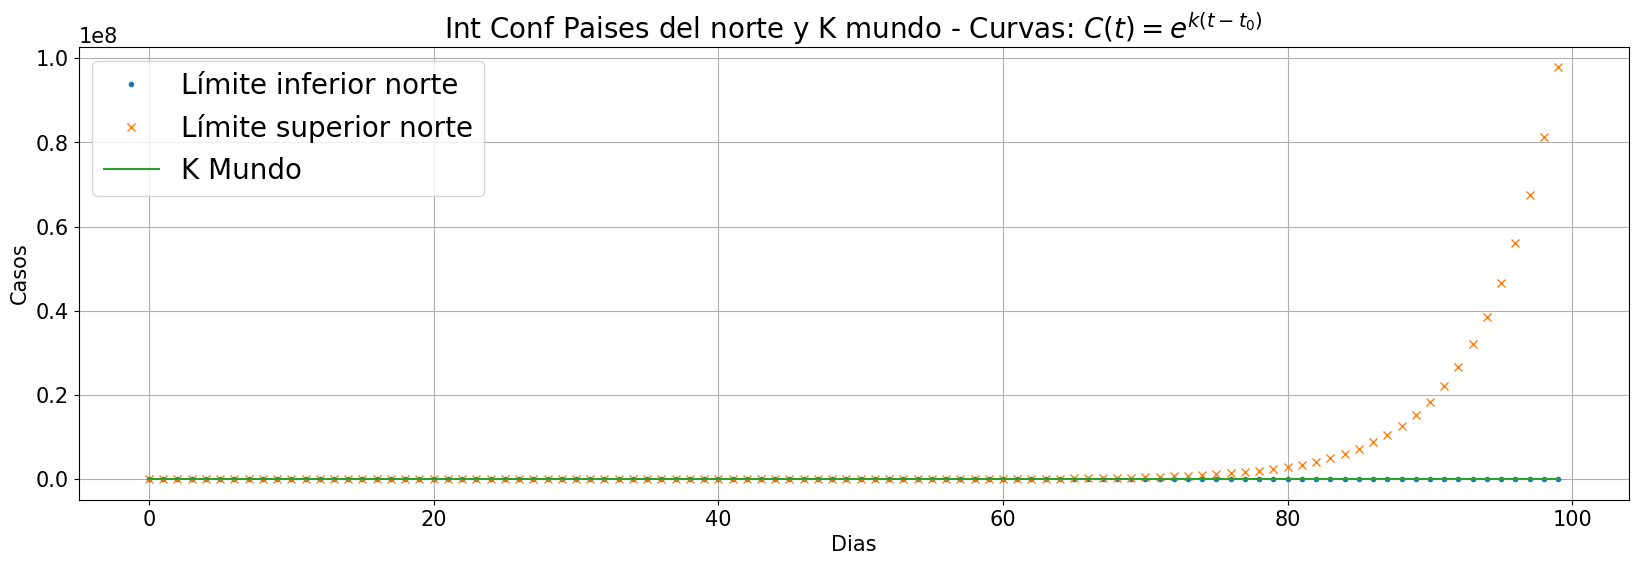

In [128]:
# Se usaran los k maximos y minimos de los 10 paises del norte y la grafica de los k de los paises mundiales. Se observa que en la grafica el limite inferior y el k mundial estan supuestamente
# en la misma escala, pero es debido al zoom, ya que el k mundial esta por fuera del intevalo de confianza.
k_min = cuantiles_norte[0]
k_max = cuantiles_norte[1]
k_mundo = k_world

dias_principio = np.arange(0,100)

casos_simu_min=exponencial(dias_principio,k_min,0)
casos_simu_max=exponencial(dias_principio,k_max,0)
casos_simu_world=exponencial(dias_principio,k_mundo,0)

plt.figure(figsize=(20, 6), dpi=100)
plt.plot(dias_principio,casos_simu_min,'.', label = 'Límite inferior norte')
plt.plot(dias_principio,casos_simu_max,'x', label = 'Límite superior norte')
plt.plot(dias_principio,casos_simu_world,'-', label = 'K Mundo ')
plt.title('Int Conf Paises del norte y K mundo - Curvas: $C(t)=e^{k(t-t_0)}$',fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
plt.xlabel('Dias',fontsize = 15)
plt.ylabel('Casos',fontsize = 15)
plt.legend(fontsize = 20)
plt.grid()
plt.show()

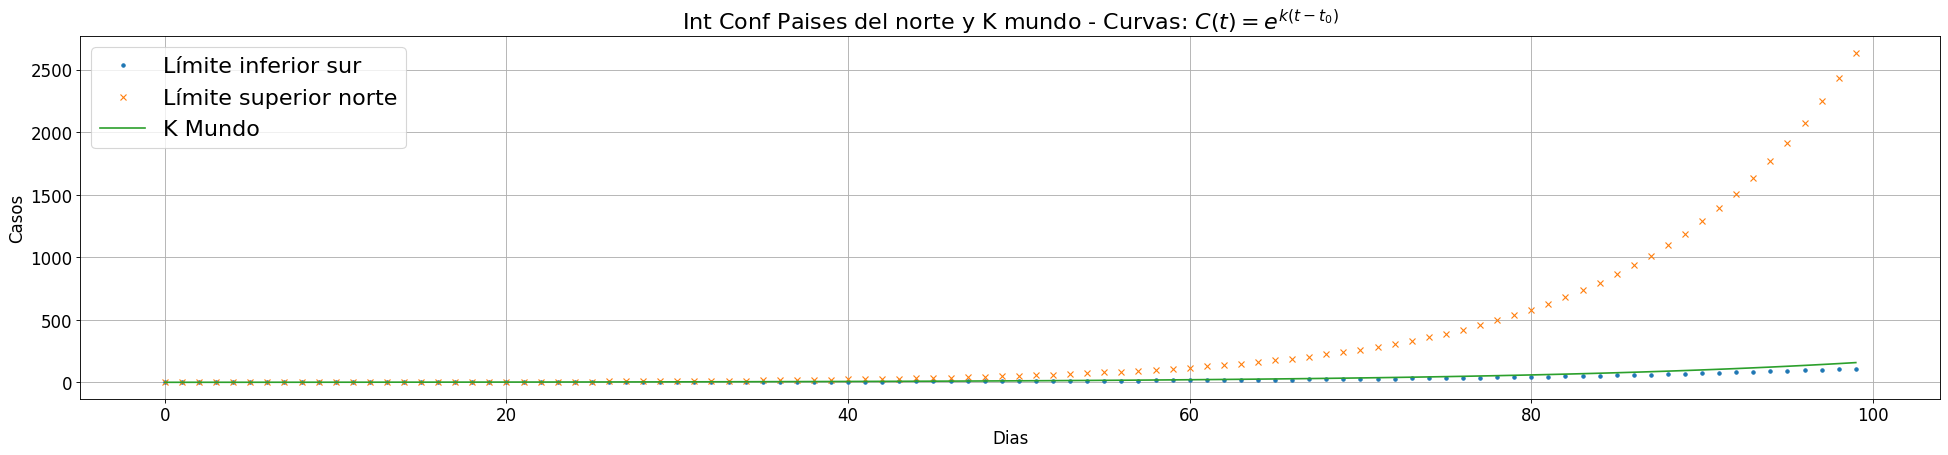

In [129]:
# Se usaran los paises del sur con los que se trabajo al final y la grafica de los paises mundiales. Se observa que la grafica de color verde, esta en el rango de confianza de los k del sur:

k_min = cuantiles_sur[0]
k_max = cuantiles_sur[1]
k_mundo = k_world

dias_principio = np.arange(0,100)

casos_simu_min=exponencial(dias_principio,k_min,0)
casos_simu_max=exponencial(dias_principio,k_max,0)
casos_simu_world=exponencial(dias_principio,k_mundo,0)

plt.figure(figsize=(30, 6), dpi=80)
plt.plot(dias_principio,casos_simu_min,'.', label = 'Límite inferior sur')
plt.plot(dias_principio,casos_simu_max,'x', label = 'Límite superior norte')
plt.plot(dias_principio,casos_simu_world,'-', label = 'K Mundo ')
plt.title('Int Conf Paises del norte y K mundo - Curvas: $C(t)=e^{k(t-t_0)}$',fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
plt.xlabel('Dias',fontsize = 15)
plt.ylabel('Casos',fontsize = 15)
plt.legend(fontsize = 20)
plt.grid()
plt.show()

## EVALUANDO ESTRATEGIAS

### f. Elige una politica publica para armar la clasificacion y tres indicadires de la misma. Justifica por que estos indicadores sirven.
### Elige una categoria binaria que hable de politicas publicas elegidas para enfrentar la pandemia que te interesa estudiar, como pueden ser "la poblacion hizo cuarentena" o "la poblacion se vacuno".
### Piensa qué indicadores de la curva pueden hablar del éxito de la política que quieres estudiar. Por ejemplo, si se tratase de evaluar el éxito de una cuarentena podría ser porcentaje de población  que se contagió o variación del valor de $k$ a partir de que se empezó a implementar esa medida. Elige al menos 3 indicadores.

Se eligira como politica publica el Stringency index, que es: " The index records the strictness of ‘lockdown style’ policies that primarily restrict people’s behaviour. It is calculated using all ordinal containment and closure policy indicators, plus an indicator recording public information campaigns." https://www.bsg.ox.ac.uk/research/research-projects/covid-19-government-response-tracker  .

Los indicadores que se usaran son: total_deaths, stringency_index, population.
* k_total_deaths: total_deaths.
* k_stringency_index: stringency_index.
* population

### g. Investiga sobre varios paises que hayan implementado o no la politica publica. Elige 5 que hayan aplicado la politica y 5 que no, para luego construir el clasificador.

* Paises con altos niveles de stringency_index: ["Canada", "China", "Italy", "India", "Indonesia"]
* Paises con bajos niveles de stringency_index: ["Sweden", "Belarus", "Nicaragua", "Japan", "Niger"]

In [130]:
datos2 = datos[["location", "stringency_index"]]
datos2

,location,stringency_index
0,Afghanistan,8.33
1,Afghanistan,8.33
2,Afghanistan,8.33
3,Afghanistan,8.33
4,Afghanistan,8.33
...,...,...
160047,Zimbabwe,NaN
160048,Zimbabwe,NaN
160049,Zimbabwe,NaN
160050,Zimbabwe,NaN


In [131]:
# Se construira el clasificador binario a partir de los paises elegidos por medio y sus porcentajes de habitantes vacunados:
# porcentaje alto stringency: 1
# porcentaje bajo stringency: 0 

alto = ["Canada", "China", "Italy", "India", "Indonesia"]
bajo = ["Sweden", "Belarus", "Nicaragua", "Japan", "Niger"]
elegidos = ["Canada", "China", "Italy", "India", "Indonesia","Sweden", "Belarus", "Nicaragua", "Japan", "Niger"]
target= [1,1,1,1,1,0,0,0,0,0]

# Ahora se realizara un dataframe vacio con los paises seleccionados, con el fin de construir el clasificador:
paises_nuevos = {"Pais": elegidos, "clasificacion": target}
dataf = pd.DataFrame(paises_nuevos)

i = 0
for pais in elegidos:
    total_death = datos["total_deaths"][(datos.location == pais)][100:601]
    stringency= datos['stringency_index'][(datos.location == pais)].mean()
    stringency_index_total_deaths  = (np.mean (stringency)  / np.mean(total_death))*100
    population = datos["population"][datos.location == pais].mean()
    dias = np.arange(100,601) 
    
    # Se reslizara el fit para las muertes totales:
    popt_deaths, pcov_deaths  = curve_fit(exponencial, dias, total_death, maxfev = 5000)    

    # Se realizara el fit para el stringency index:   
    #popt_stringency, pcov_stringency  = curve_fit(exponencial, dias, stringency_index_total_deaths , maxfev = 5000)     
    
    #Ahora se insertaran los datos en la tabla anterior:
    dataf.loc[i,'k_total_deaths'] =  popt_deaths[0]
    dataf.loc[i,'stringency / total_death']   =  stringency_index_total_deaths
    dataf.loc[i,"population"] =  population
    dataf.loc[i,"stringency_index"] =  stringency
    i = i + 1

    
dataf

,Pais,clasificacion,k_total_deaths,stringency / total_death,population,stringency_index
0,Canada,1,0.994270,0.385583,3.806791e+07,65.796975
1,China,1,0.992810,1.551153,1.444216e+09,71.894810
2,Italy,1,0.996290,0.089794,6.036747e+07,71.411834
3,India,1,0.995344,0.037565,1.393409e+09,68.813670
4,Indonesia,1,0.995928,0.144110,2.763618e+08,65.534536
5,Sweden,0,0.991570,0.509594,1.016016e+07,50.636997
6,Belarus,0,0.993167,1.599684,9.442867e+06,31.811960
7,Nicaragua,0,0.993487,6.292326,6.702379e+06,10.660030
8,Japan,0,0.996485,0.659668,1.260508e+08,42.064526
9,Niger,0,0.993087,18.674233,2.513081e+07,26.861076


In [132]:
num_col = dataf.select_dtypes(include = 'number').drop('clasificacion', axis = 1).columns.to_list()
num_col

['k_total_deaths',
 'stringency / total_death',
 'population',
 'stringency_index']

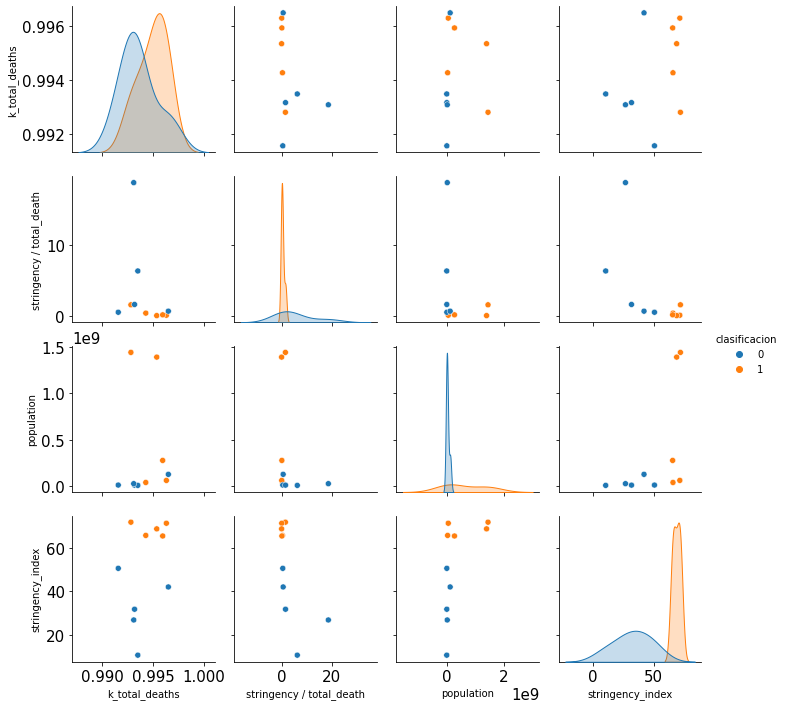

In [133]:
import seaborn as sns
sns.pairplot(data = dataf, hue = 'clasificacion', x_vars = num_col, y_vars = num_col)
plt.savefig(fname = 'pairplot.jpg', bbox_inches = 'tight', dpi = 200)
plt.show()

Se observa que los paises con mayor cantidad de indice de abstinencia o stringency_index, son los que mas muertes han tenido y en la clasificacion aparecen con el numero 0 o color azul. Se observa en la grafica de poblacion que a mayor cantidad de poblacion, menor cantidad de indice de abstinencia se encuentra.

#### h. Mide los indicadores que hayas elegido en los paises del punto anterior. A partir de eso, elabora modelos de regresion logistica y usalos para clasificar los datos de otros paises nuevos.
#### Construye un clasificador binario a partir de una regresión logística o usando Naive Bayes para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en función da las categorías "la población hizo cuarentena" y "la población no hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados.

Se usara un modelo benchmark con un accuracy del 50%, para poder tener una exactitud del modelo a predecir. Se hara referencia a si un pais realizo o no restricciones altas o bajas en la variable X y los paises a predecir estaran en la variable Y.

In [150]:
# Para realizar lo anterior se trabajaran con las siguientes librerias: 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
## Librerías de optimización de modelos:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, learning_curve, RandomizedSearchCV
import warnings
warnings.filterwarnings(action="ignore")

In [151]:
# Se empieza a realilzar el modelo con el que se evaluara la politica publica y se dividiran en set de entrenamiento y de prueba:
# Se divide entre X y Y, y se dejara como objetivo la variable clasificacion.

X = dataf.drop(["Pais", "clasificacion"], axis = 1)
y = dataf.clasificacion

## Separo en train y test:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### LOGISTIC REGRESSION

In [152]:
# Se usara regresion logistica en este apartado:
logi_regre = LogisticRegression()

In [153]:
# Se obtendran los hiperparametros para el modelo de regresion logistica:
params = {
    "solver": ['newton-cg', 'lbfgs', 'liblinear', "sag", "saga"],
    "penalty": ['l2', "elasticnet"],
    "max_iter": [10, 50],
    "multi_class": ["auto", "ovr", "multinominal"]    
}

lr_cv = GridSearchCV(estimator=logi_regre, param_grid=params,
                      cv=3).fit(X_train,y_train)

In [154]:
# se muestran los mejores hiperparametros elegidos:
print(f"El mejor RMSE es: {round(-1 * lr_cv.best_score_ * 100, 2)}%")

print("Los mejores hiperparametros son: ")
for key, value in lr_cv.best_params_.items():
    print(f"{key}: {value}")

El mejor RMSE es: 50.79%
Los mejores hiperparametros son: 
max_iter: 50
multi_class: auto
penalty: l2
solver: newton-cg


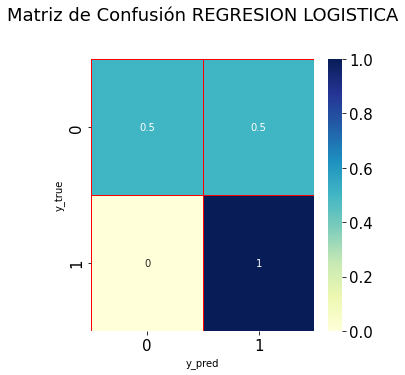

In [155]:
# Ahora se realizara una matriz de confusion con el fin de analilzar los mejores clasificadores de la regresion logistica a ser impñementados:
y_predict_lr = lr_cv.predict(X_test)

names=["0","1"]
cm=confusion_matrix(y_test,y_predict_lr,normalize='true')
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",ax=ax, cmap="YlGnBu") #fmt=".0f",
plt.title('Matriz de Confusión REGRESION LOGISTICA', fontsize = 18, y = 1.12)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()



In [156]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_lr))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



### NAIVE BAYES

In [157]:
# Ahora se realizara lo anterior con Naive Bayes:
nai_ba = GaussianNB()
nai_ba.fit(X_train,y_train)

GaussianNB()

In [158]:
# Se obtendran los hiperparametros para el modelo de regresion logistica:
scores = cross_val_score(nai_ba, X_train, y_train, cv = 4, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.5 0.5 1.  1. ]


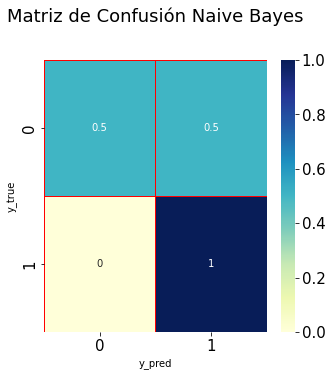

In [159]:
# Ahora se realizara una matriz de confusion con el fin de analilzar los mejores clasificadores de la regresion logistica a ser impñementados:
y_predict_nb = nai_ba.predict(X_test)

names=["0","1"]
cm=confusion_matrix(y_test,y_predict_nb,normalize='true')
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",ax=ax, cmap="YlGnBu") #fmt=".0f",
plt.title('Matriz de Confusión Naive Bayes', fontsize = 18, y = 1.12)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()


In [160]:
print(classification_report(y_test, y_predict_nb))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



### RandomForestClassifier

In [161]:
random_forest = RandomForestClassifier()

In [162]:
# Se habian escrito muchos mas hiperparametros, pero solamente se van a dejar los mejores de cada modelo, con el fin de optimizar el procesamiento:
params = {
    "n_estimators": [10, 100,500], # numero de arboles
    "min_samples_split": [2],
    "max_depth": [100],
    "max_features": ["log2"],
    "oob_score": [True],
    "ccp_alpha": [0.3], # Parametro para podar el arbol
    #"criterion": ["mse"],
    "random_state":[42], # controla la aleatoriedad del bootstrapping y el tipo de muestras a considerar buscando la mejor
    "bootstrap":[True]
}

rf_cv = GridSearchCV(estimator=random_forest, param_grid=params,
                     scoring="neg_root_mean_squared_error", cv=4).fit(X_train,y_train)

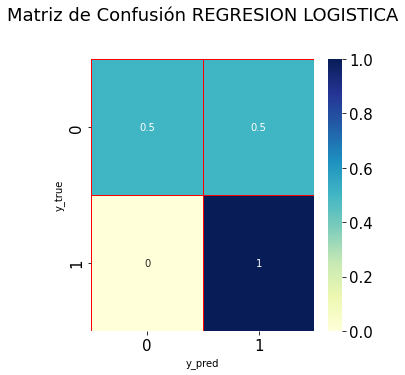

In [163]:
# Ahora se realizara una matriz de confusion con el fin de analilzar los mejores clasificadores de la regresion logistica a ser impñementados:

y_predict_rf = rf_cv.predict(X_test)

names=["0","1"]
cm=confusion_matrix(y_test,y_predict_rf,normalize='true')
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",ax=ax, cmap="YlGnBu") #fmt=".0f",
plt.title('Matriz de Confusión REGRESION LOGISTICA', fontsize = 18, y = 1.12)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()


In [164]:
print(classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

